#**Stat 108 Final Project**
By: Peter Lu, Shan Santhakumar, Tristan Dull, Eden Fraczkiewicz

**Project description:**

**Dataset description:** 253,680 rows × 22 columns

Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes

HighBP: 0 = no high, BP 1 = high BP

HighChol: 0 = no high cholesterol, 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]. 0 = no, 1 = yes

Stroke: (Ever told) you had a stroke. 0 = no, 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes

PhysActivity: physical activity in past 30 days - not including job. 0 = no, 1 = yes

Fruits: Consume Fruit 1 or more times per day, 0 = no, 1 = yes

Veggies: Consume Vegetables 1 or more times per day. 0 = no, 1 = yes

HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes

AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes

NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5, 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes

Sex: 0 = female, 1 = male

Age:	Age	13-level age category (_AGEG5YR see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older

Education: Education Level	Education level (EDUCA see codebook). scale 1-6, 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)

Income: Income scale (INCOME2 see codebook). scale 1-8, 1 = less than 10,000, 5 = less than 35,000, 8 = 75,000 or more

**Plans for EDA, modeling, fairness evaluation techniques, and bias mitigation techniques:**

**Contributions:**

In [ ]:
!pip install ucimlrepo
!pip install aequitas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
from aequitas import Audit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# variable information
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [ ]:
#combining the feature dataset and diabetes diagnosis dataset
df = X
df.loc[:, "Diabetes_binary"] = y
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [ ]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Below are the histograms for all numerical variables, excluding binary (Tristans homework)

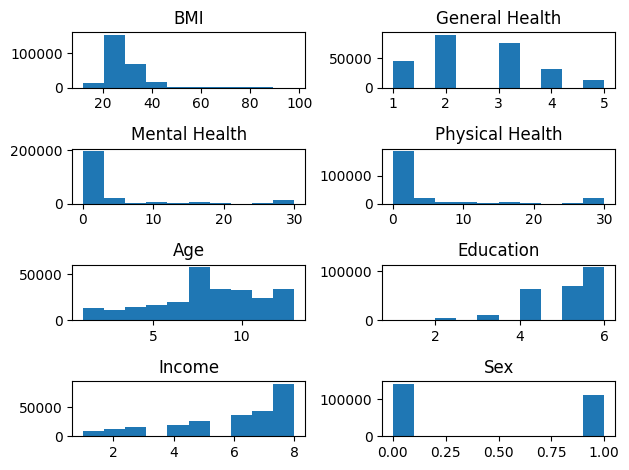

In [ ]:
plt.subplot(4,2,1)
plt.hist(X.BMI)
plt.title("BMI")

plt.subplot(4,2,2)
plt.hist(X.GenHlth)
plt.title("General Health")

plt.subplot(4,2,3)
plt.hist(X.MentHlth)
plt.title("Mental Health")

plt.subplot(4,2,4)
plt.hist(X.PhysHlth)
plt.title("Physical Health")

plt.subplot(4,2,5)
plt.hist(X.Age)
plt.title("Age")

plt.subplot(4,2,6)
plt.hist(X.Education)
plt.title("Education")

plt.subplot(4,2,7)
plt.hist(X.Income)
plt.title("Income")

plt.subplot(4,2,8)
plt.hist(X.Sex)
plt.title("Sex")

plt.tight_layout()

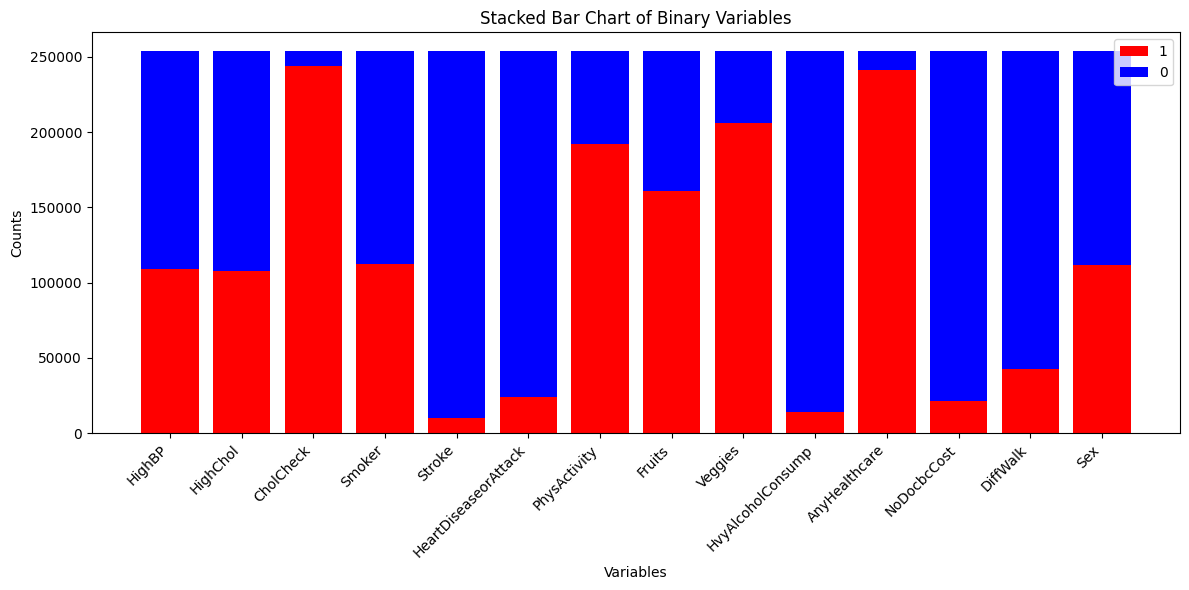

In [ ]:
# make stacked bar plot of binary variables
# create data
df_binary = df.drop(columns=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth',
                             'Age', 'Education', 'Income'])


HighBP_count = df_binary['HighBP'].sum()
HighChol_count = df_binary['HighChol'].sum()
CholCheck_count = df_binary['CholCheck'].sum()
Smoker_count = df_binary['Smoker'].sum()
Stroke_count = df_binary['Stroke'].sum()
HeartDiseaseorAttack_count = df_binary['HeartDiseaseorAttack'].sum()
PhysActivity_count = df_binary['PhysActivity'].sum()
Fruits_count = df_binary['Fruits'].sum()
Veggies_count = df_binary['Veggies'].sum()
HvyAlcoholConsump_count = df_binary['HvyAlcoholConsump'].sum()
AnyHealthcare_count = df_binary['AnyHealthcare'].sum()
NoDocbcCost_count = df_binary['NoDocbcCost'].sum()
DiffWalk_count = df_binary['DiffWalk'].sum()
Sex_count = df_binary['Sex'].sum()

# Binary variables
variables = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
             'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
             'Fruits', 'Veggies', 'HvyAlcoholConsump',
             'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
             'Sex']

# Counts for 1s
counts_ones = [HighBP_count, HighChol_count, CholCheck_count,
          Smoker_count, Stroke_count, HeartDiseaseorAttack_count,
          PhysActivity_count, Fruits_count, Veggies_count,
          HvyAlcoholConsump_count, AnyHealthcare_count,
          NoDocbcCost_count, DiffWalk_count, Sex_count]

# Calculate counts for 0s
total_rows = len(df_binary)
counts_zeros = [total_rows - count for count in counts_ones]

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))

plt.bar(variables, counts_ones, label='1', color='red')
plt.bar(variables, counts_zeros, bottom=counts_ones, label='0', color='blue')

plt.xlabel('Variables')
plt.ylabel('Counts')
plt.title('Stacked Bar Chart of Binary Variables')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

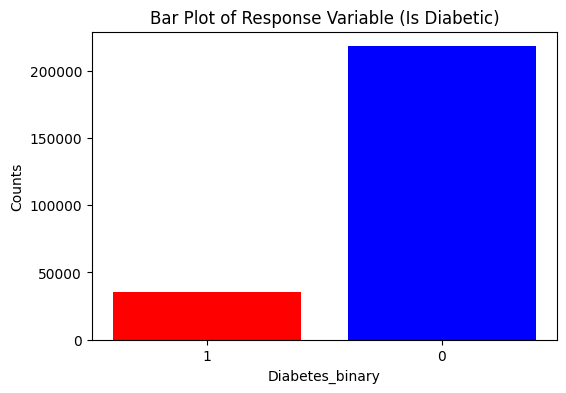

In [ ]:
# Bar chart of Y
Diabetes_binary_count = df['Diabetes_binary'].sum()

counts_zeros = total_rows - Diabetes_binary_count

# Counts for 1s and 0s
counts = [Diabetes_binary_count, counts_zeros]

# Labels for the bars
categories = ['1', '0']

# Plotting the bar plot
plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['red', 'blue'])
plt.xlabel('Diabetes_binary')
plt.ylabel('Counts')
plt.title('Bar Plot of Response Variable (Is Diabetic)')
plt.show()

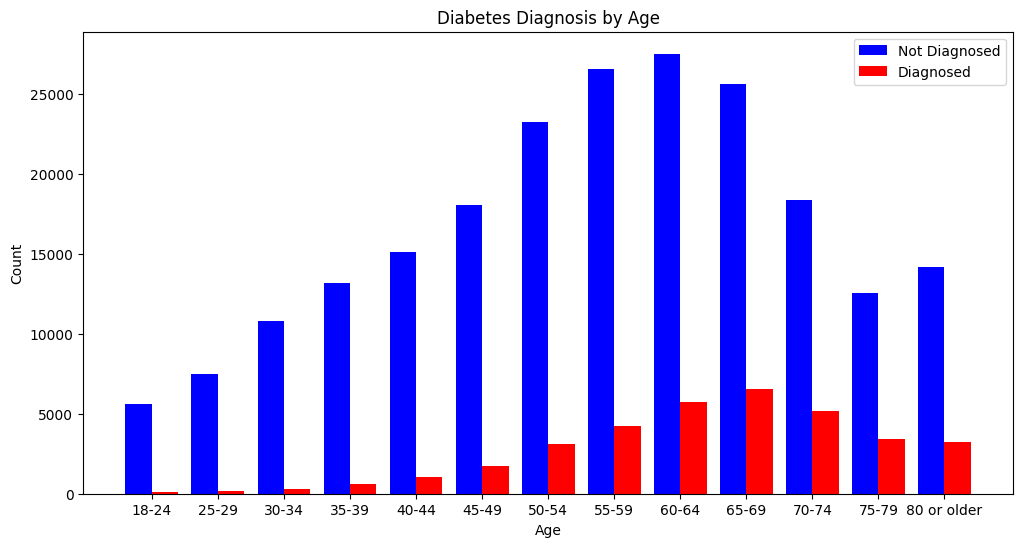

In [ ]:
age_diab = pd.crosstab(df['Age'], df['Diabetes_binary'])

plt.figure(figsize = (12, 6))
width = 0.40
x = range(len(age_diab.index))
plt.bar([i - width/2 for i in x], age_diab[0], width = width, label = 'Not Diagnosed', color = 'blue')
plt.bar([i + width/2 for i in x], age_diab[1], width = width, label = 'Diagnosed', color = 'red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Diabetes Diagnosis by Age')
plt.xticks(x, ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])
plt.legend()
plt.show()

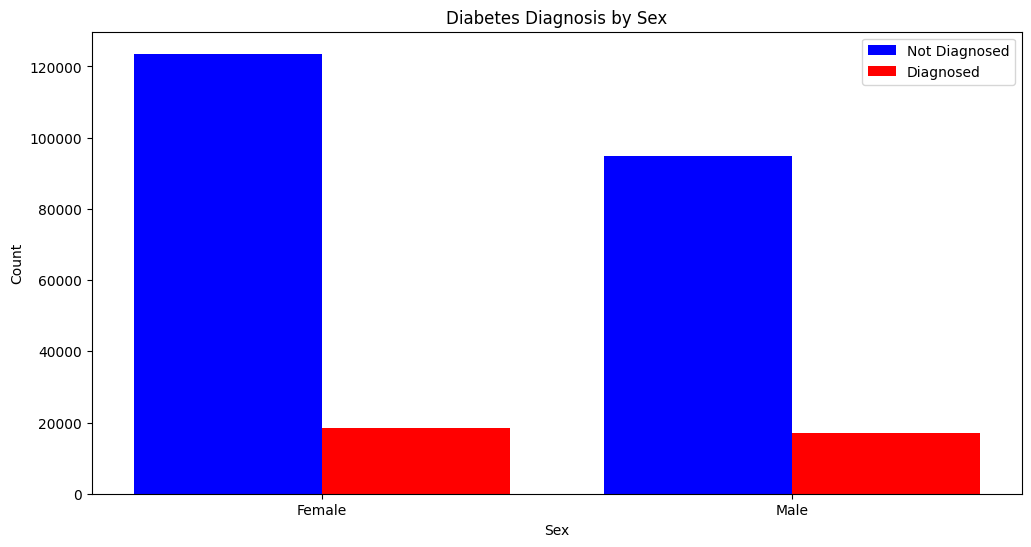

In [ ]:
sex_diab = pd.crosstab(df['Sex'], df['Diabetes_binary'])

plt.figure(figsize = (12, 6))
width = 0.40
x = range(len(sex_diab.index))
plt.bar([i - width/2 for i in x], sex_diab[0], width = width, label = 'Not Diagnosed', color = 'blue')
plt.bar([i + width/2 for i in x], sex_diab[1], width = width, label = 'Diagnosed', color = 'red')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Diabetes Diagnosis by Sex')
plt.xticks(x, ['Female', 'Male'])
plt.legend()
plt.show()

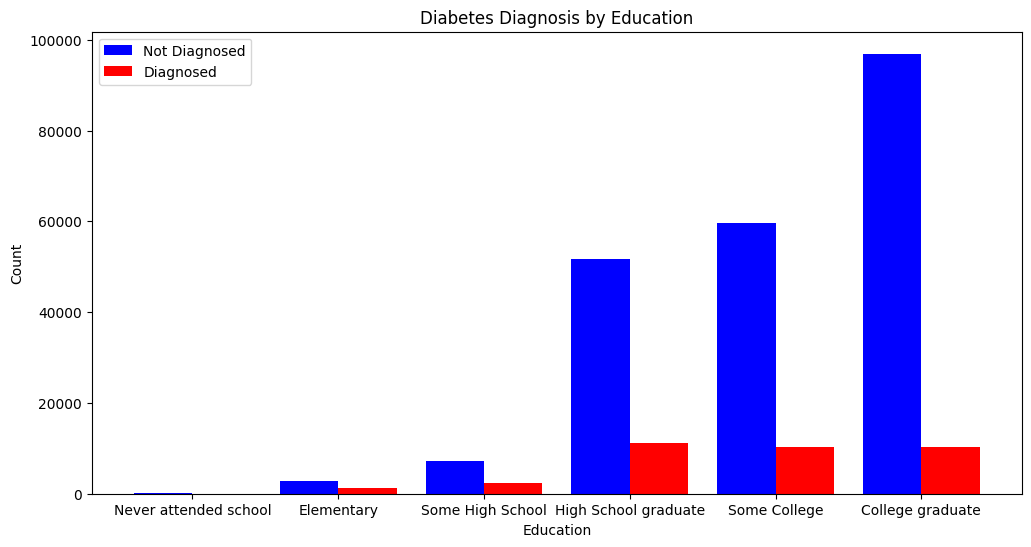

In [ ]:
edu_diab = pd.crosstab(df['Education'], df['Diabetes_binary'])

plt.figure(figsize = (12, 6))
width = 0.40
x = range(len(edu_diab.index))
plt.bar([i - width/2 for i in x], edu_diab[0], width = width, label = 'Not Diagnosed', color = 'blue')
plt.bar([i + width/2 for i in x], edu_diab[1], width = width, label = 'Diagnosed', color = 'red')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Diabetes Diagnosis by Education')
plt.xticks(x, ['Never attended school', 'Elementary', 'Some High School', 'High School graduate', 'Some College', 'College graduate'])
plt.legend()
plt.show()

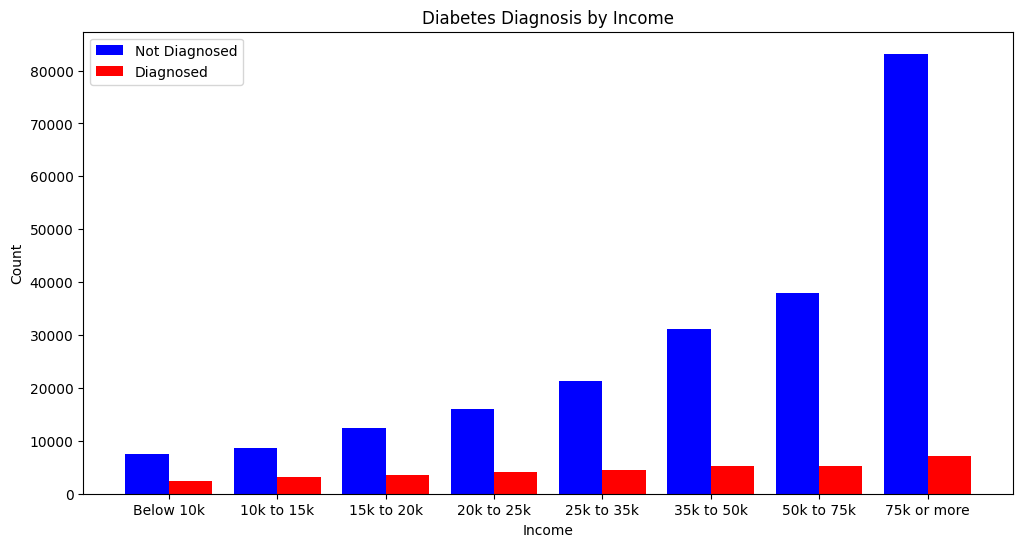

In [ ]:
income_diab = pd.crosstab(df['Income'], df['Diabetes_binary'])

plt.figure(figsize = (12, 6))
width = 0.40
x = range(len(income_diab.index))
plt.bar([i - width/2 for i in x], income_diab[0], width = width, label = 'Not Diagnosed', color = 'blue')
plt.bar([i + width/2 for i in x], income_diab[1], width = width, label = 'Diagnosed', color = 'red')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Diabetes Diagnosis by Income')
plt.xticks(x, ['Below 10k', '10k to 15k', '15k to 20k', '20k to 25k', '25k to 35k', '35k to 50k', '50k to 75k', '75k or more'])
plt.legend()
plt.show()

In [ ]:
# One hot encode categorical variables

# Define the bucketing thresholds for each categorical variable
buckets = {
    'BMI': [0, 18.5, 25, 100],
    'GenHlth': [0, 3, 100],
    'MentHlth': [0, 10, 20, 100],
    'PhysHlth': [0, 10, 20, 100],
    'Age': [0, 5, 10, 100],
    'Education': [0, 2, 4, 100],
    'Income': [0, 3, 6, 100]
}

X_copy = X.copy()

# Bucket the categorical variables based on the specified thresholds
for col, bins in buckets.items():
    X_copy.loc[:,col] = pd.cut(X_copy[col], bins, labels=False, right=False)

# One-hot encode the categorical variables
categorical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age',
                        'Education', 'Income']
df_encoded = pd.get_dummies(X_copy, columns=categorical_features)

renamed_cols = {'BMI_0':'BMI_0_to_18.5',
                'BMI_1':'BMI_18.5_to_25',
                'BMI_2':'BMI_25_or_more',
                'GenHlth_0':'GenHlth_1_to_2',
                'GenHlth_1':'GenHlth_3_to_5',
                'MentHlth_0':'MentHlth_1_to_9',
                'MentHlth_1':'MentHlth_10_to_19',
                'MentHlth_2':'MentHlth_20_or_more',
                'PhysHlth_0':'PhysHlth_1_to_9',
                'PhysHlth_1':'PhysHlth_10_to_19',
                'PhysHlth_2':'PhysHlth_20_or_more',
                'Age_0':'Age_0_to_4',
                'Age_1':'Age_4_to_9',
                'Age_2':'Age_10_to_15',
                'Education_0':'Education_0_to_1',
                'Education_1':'Education_2_to_3',
                'Education_2':'Education_4_to_6',
                'Income_0':'Income_0_to_2',
                'Income_1':'Income_3_to_5',
                'Income_2':'Income_6_to_8'}

df_encoded = df_encoded.rename(columns = renamed_cols)
df_encoded.drop("Diabetes_binary", axis=1, inplace=True)
# Display the encoded DataFrame
df_encoded.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,PhysHlth_20_or_more,Age_0_to_4,Age_4_to_9,Age_10_to_15,Education_0_to_1,Education_2_to_3,Education_4_to_6,Income_0_to_2,Income_3_to_5,Income_6_to_8
0,1,1,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,1,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
y = np.array(y).ravel()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y,
                                                    test_size=0.2,
                                                    random_state=1)
# Build Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit model on training data
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy:", train_accuracy)

# Predictions on testing data
y_test_pred = model.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8615529407127089
Testing Accuracy: 0.8598825291706086


In [ ]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = df_encoded.columns

# Create a dictionary mapping feature names to coefficients
feature_coefficient = dict(zip(feature_names, coefficients))

# Sort the dictionary by absolute coefficient values
sorted_coefficients = sorted(feature_coefficient.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top N most important variables
top_n = 10  # Adjust this number based on how many top features you want to see
print(f"Top {top_n} most important variables:")
for feature, coefficient in sorted_coefficients[:top_n]:
    print(f"{feature}: {coefficient}")

Top 10 most important variables:
CholCheck: 1.229879330295771
GenHlth_1_to_2: -1.1363964606450898
Age_0_to_4: -1.1114631553218837
BMI_0_to_18.5: -1.0044186363438121
HighBP: 0.8343690929096355
HvyAlcoholConsump: -0.8160444351603218
Income_6_to_8: -0.6215614250785153
Education_4_to_6: -0.5960160039628957
BMI_18.5_to_25: -0.5574643470676308
HighChol: 0.5548413035044115


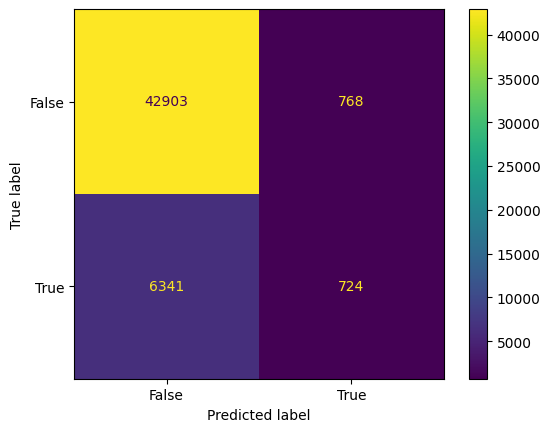

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)
score_mnb = round(accuracy_score(y_test, predmnb) * 100, 2)

print("Accuracy:", score_mnb)
print("Classification Report:")
print(classification_report(y_test, predmnb))

Accuracy: 82.39
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     43671
           1       0.37      0.39      0.38      7065

    accuracy                           0.82     50736
   macro avg       0.64      0.64      0.64     50736
weighted avg       0.83      0.82      0.83     50736



Confusion Matrix for Multinomial Naive Bayes:


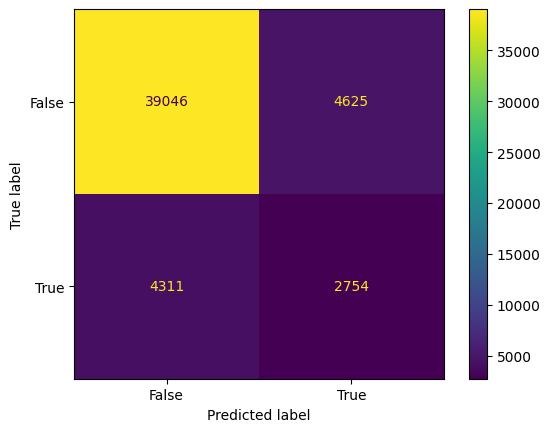

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
ConfusionMatrixDisplay.from_estimator(mnb, X_test, y_test, display_labels = ["False", "True"])
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)
score_dt = round(accuracy_score(y_test, preddt) * 100, 2)

print("Accuracy:", score_dt)
print("Classification Report:")
print(classification_report(y_test, preddt))

Accuracy: 83.76
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     43671
           1       0.33      0.17      0.22      7065

    accuracy                           0.84     50736
   macro avg       0.60      0.56      0.57     50736
weighted avg       0.80      0.84      0.81     50736



Confusion Matrix for Decision Tree:


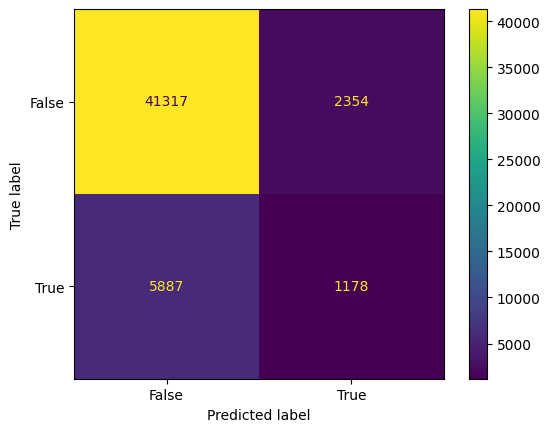

In [ ]:
print("Confusion Matrix for Decision Tree:")
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, display_labels = ["False", "True"])
plt.show()

In [ ]:
# Resample data so there is an even number of those with diabetes and those without it

from sklearn.utils import resample
# Concatenate predictors (features) and labels
df_with_labels = pd.concat([df_encoded, pd.Series(y, name='label')], axis=1)

# Separate instances for class 0 and class 1
class_0 = df_with_labels[df_with_labels['label'] == 0]
class_1 = df_with_labels[df_with_labels['label'] == 1]

# Resample class 0 to have the same number of instances as class 1
class_0_resampled = resample(class_0,
                              replace=False,     # Without replacement
                              n_samples=len(class_1),   # Sample size equal to class 1
                              random_state=42)  # For reproducibility

# Concatenate resampled class 0 with original class 1
balanced_df = pd.concat([class_0_resampled, class_1])

# Separate predictors and labels again
X_balanced1 = balanced_df.drop('label', axis=1)
y_balanced1 = balanced_df['label']
len(balanced_df)

70692

In [ ]:
# rebuild model with resampled data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced1, y_balanced1, test_size=0.2, random_state=1)

# Build Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit model on training data
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy:", train_accuracy)

# Predictions on testing data
y_test_pred = model.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.738935158170212
Testing Accuracy: 0.7388782799349317


In [ ]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_balanced1.columns

# Create a dictionary mapping feature names to coefficients
feature_coefficient = dict(zip(feature_names, coefficients))

# Sort the dictionary by absolute coefficient values
sorted_coefficients = sorted(feature_coefficient.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top N most important variables
top_n = 10  # Adjust this number based on how many top features you want to see
print(f"Top {top_n} most important variables:")
for feature, coefficient in sorted_coefficients[:top_n]:
    print(f"{feature}: {coefficient}")

Top 10 most important variables:
CholCheck: 1.257991279099898
HighBP: 0.8637474381063052
HvyAlcoholConsump: -0.859363098117917
Age_0_to_4: -0.7269426533947599
BMI_25_or_more: 0.7011258776655445
HighChol: 0.5624715372972916
Age_10_to_15: 0.5461507356146715
BMI_0_to_18.5: -0.5234066425622391
GenHlth_3_to_5: 0.5186518144758882
GenHlth_1_to_2: -0.5082821909544473


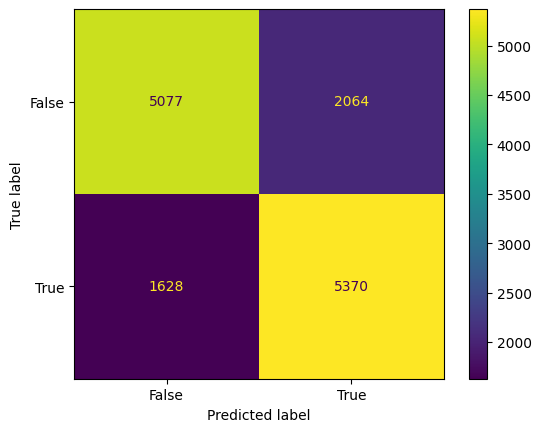

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)
score_mnb = round(accuracy_score(y_test, predmnb) * 100, 2)

print("Accuracy:", score_mnb)
print("Classification Report:")
print(classification_report(y_test, predmnb))

Accuracy: 72.39
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      7141
           1       0.72      0.73      0.72      6998

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



Confusion Matrix for Multinomial Naive Bayes:


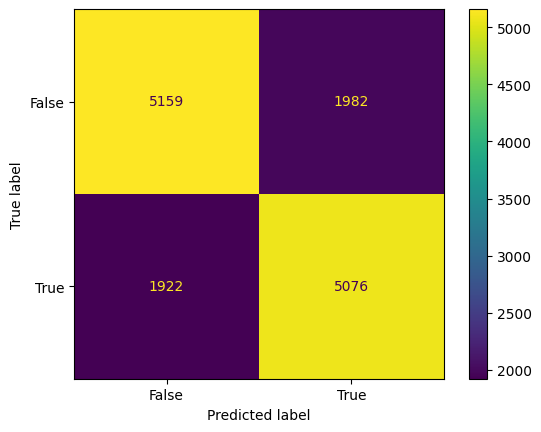

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
ConfusionMatrixDisplay.from_estimator(mnb, X_test, y_test, display_labels = ["False", "True"])
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)
score_dt = round(accuracy_score(y_test, preddt) * 100, 2)

print("Accuracy:", score_dt)
print("Classification Report:")
print(classification_report(y_test, preddt))

Accuracy: 68.34
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      7141
           1       0.68      0.67      0.68      6998

    accuracy                           0.68     14139
   macro avg       0.68      0.68      0.68     14139
weighted avg       0.68      0.68      0.68     14139



Confusion Matrix for Decision Tree:


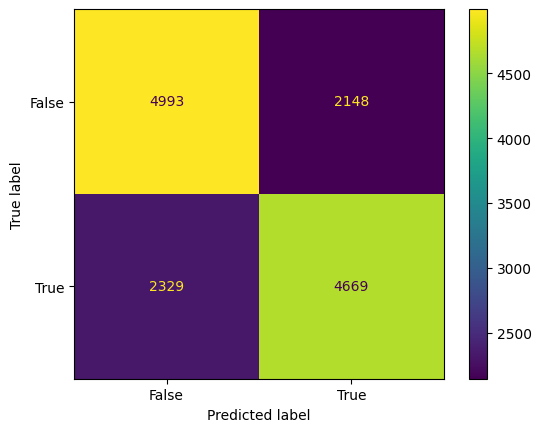

In [ ]:
print("Confusion Matrix for Decision Tree:")
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, display_labels = ["False", "True"])
plt.show()

In [ ]:
#finding the predicted values for the entire dataset
full_df = X_balanced1.to_numpy()
full_pred = model.predict(full_df)

# Sample un-encoded data
# Concatenate predictors (features) and labels
df_with_labels = pd.concat([df, pd.Series(y, name='label')], axis=1)

# Separate instances for class 0 and class 1
class_0 = df_with_labels[df_with_labels['label'] == 0]
class_1 = df_with_labels[df_with_labels['label'] == 1]

# Resample class 0 to have the same number of instances as class 1
class_0_resampled = resample(class_0,
                              replace=False,     # Without replacement
                              n_samples=len(class_1),   # Sample size equal to class 1
                              random_state=42)  # For reproducibility

# Concatenate resampled class 0 with original class 1
balanced_df = pd.concat([class_0_resampled, class_1])

# Separate predictors and labels again
X_balanced = balanced_df.drop('label', axis=1)
y_balanced = balanced_df['label']


df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()


#convert to string
df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

#convert to categorical columns
df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44', '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69', '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary', '3': 'Some High School', '4': 'High School graduate', '5': 'Some College', '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k', '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})

df_audit['label_value'] = y_balanced1
df_audit['score'] = full_pred
df_audit.head()

,Age,Education,Income,Sex,label_value,score
9362,35-39,College graduate,50k to 75k,Female,0,0
1082,70-74,High School graduate,25k to 35k,Female,0,1
148278,25-29,College graduate,75k or more,Female,0,0
57301,80 or older,College graduate,Below 10k,Male,0,0
127572,80 or older,Some College,35k to 50k,Female,0,0


([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

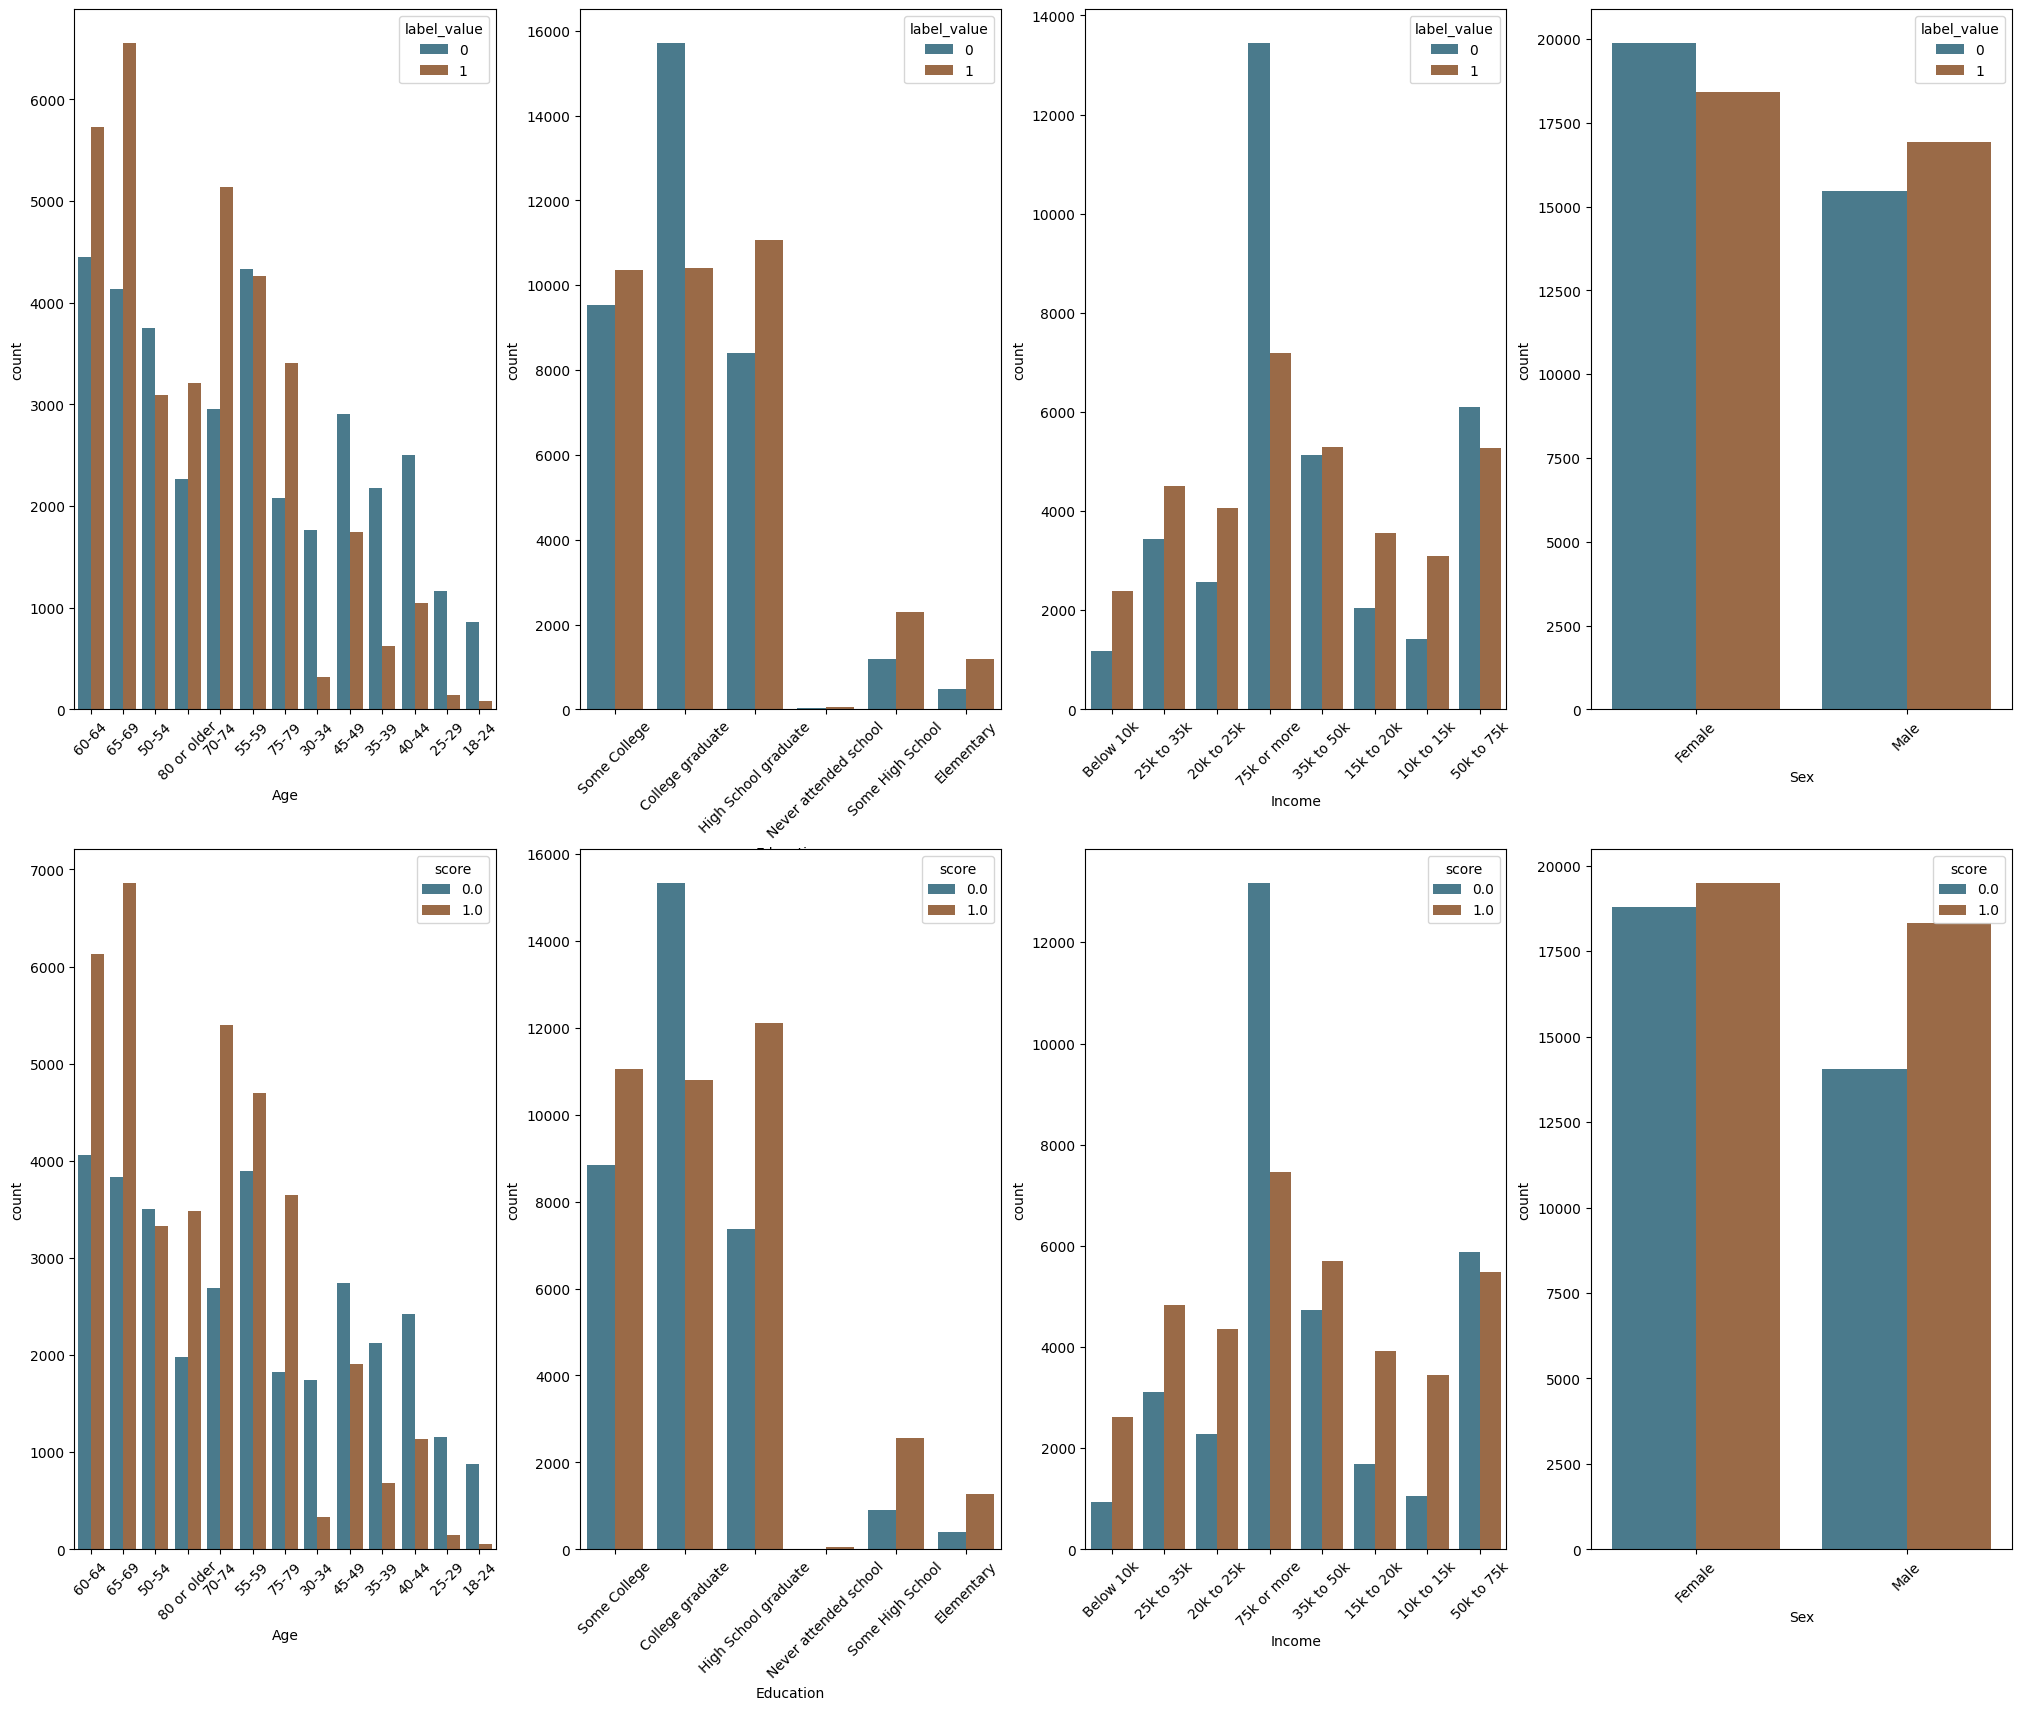

In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)

plt.figure(figsize = (25, 20))

plt.subplot(2, 4, 1)
label_by_age = sns.countplot(x="Age", hue="label_value", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 2)
label_by_education = sns.countplot(x="Education", hue="label_value", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 3)
label_by_income = sns.countplot(x="Income", hue="label_value", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 4)
label_by_sex = sns.countplot(x="Sex", hue="label_value", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 5)
by_age = sns.countplot(x="Age", hue="score", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 6)
by_education = sns.countplot(x="Education", hue="score", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 7)
by_income = sns.countplot(x="Income", hue="score", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

plt.subplot(2, 4, 8)
by_sex = sns.countplot(x="Sex", hue="score", data=df_audit, palette=aq_palette)
plt.xticks(rotation=45)

In [ ]:
# Create Group object
g = Group()

# Generate crosstabs
xtab, _ = g.get_crosstabs(df_audit)

# Compute metrics
absolute_metrics = g.list_absolute_metrics(xtab)

# Displays crosstab info for confusion matrix metrics + metadata
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,37466,Age,18-24,14,925,8,72,853,6,78,861,939,70692
1,0,binary 0/1,37466,Age,25-29,38,1270,15,117,1153,23,140,1168,1308,70692
2,0,binary 0/1,37466,Age,30-34,99,1982,46,261,1721,53,314,1767,2081,70692
3,0,binary 0/1,37466,Age,35-39,248,2560,76,454,2106,172,626,2182,2808,70692
4,0,binary 0/1,37466,Age,40-44,1089,2463,406,368,2095,683,1051,2501,3552,70692
5,0,binary 0/1,37466,Age,45-49,1806,2840,593,529,2311,1213,1742,2904,4646,70692
6,0,binary 0/1,37466,Age,50-54,3135,3701,918,871,2830,2217,3088,3748,6836,70692
7,0,binary 0/1,37466,Age,55-59,4379,4218,1207,1091,3127,3172,4263,4334,8597,70692
8,0,binary 0/1,37466,Age,60-64,5694,4489,1361,1400,3089,4333,5733,4450,10183,70692
9,0,binary 0/1,37466,Age,65-69,7394,3300,1848,1012,2288,5546,6558,4136,10694,70692


In [ ]:
# Displays absolute metrics computed using confusion matrix metrics
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Age,18-24,0.91,0.08,0.99,0.08,0.57,0.01,0.92,0.92,0.43,0.00,0.01,0.08
1,Age,25-29,0.90,0.16,0.99,0.09,0.39,0.01,0.84,0.91,0.61,0.00,0.03,0.11
2,Age,30-34,0.85,0.17,0.97,0.13,0.46,0.03,0.83,0.87,0.54,0.00,0.05,0.15
3,Age,35-39,0.81,0.27,0.97,0.18,0.31,0.03,0.73,0.82,0.69,0.01,0.09,0.22
4,Age,40-44,0.78,0.65,0.84,0.15,0.37,0.16,0.35,0.85,0.63,0.03,0.31,0.30
5,Age,45-49,0.76,0.70,0.80,0.19,0.33,0.20,0.30,0.81,0.67,0.05,0.39,0.37
6,Age,50-54,0.74,0.72,0.76,0.24,0.29,0.24,0.28,0.76,0.71,0.08,0.46,0.45
7,Age,55-59,0.73,0.74,0.72,0.26,0.28,0.28,0.26,0.74,0.72,0.12,0.51,0.50
8,Age,60-64,0.73,0.76,0.69,0.31,0.24,0.31,0.24,0.69,0.76,0.15,0.56,0.56
9,Age,65-69,0.73,0.85,0.55,0.31,0.25,0.45,0.15,0.69,0.75,0.20,0.69,0.61


In [ ]:
# Create an Aequitas plot
aqp = Plot()

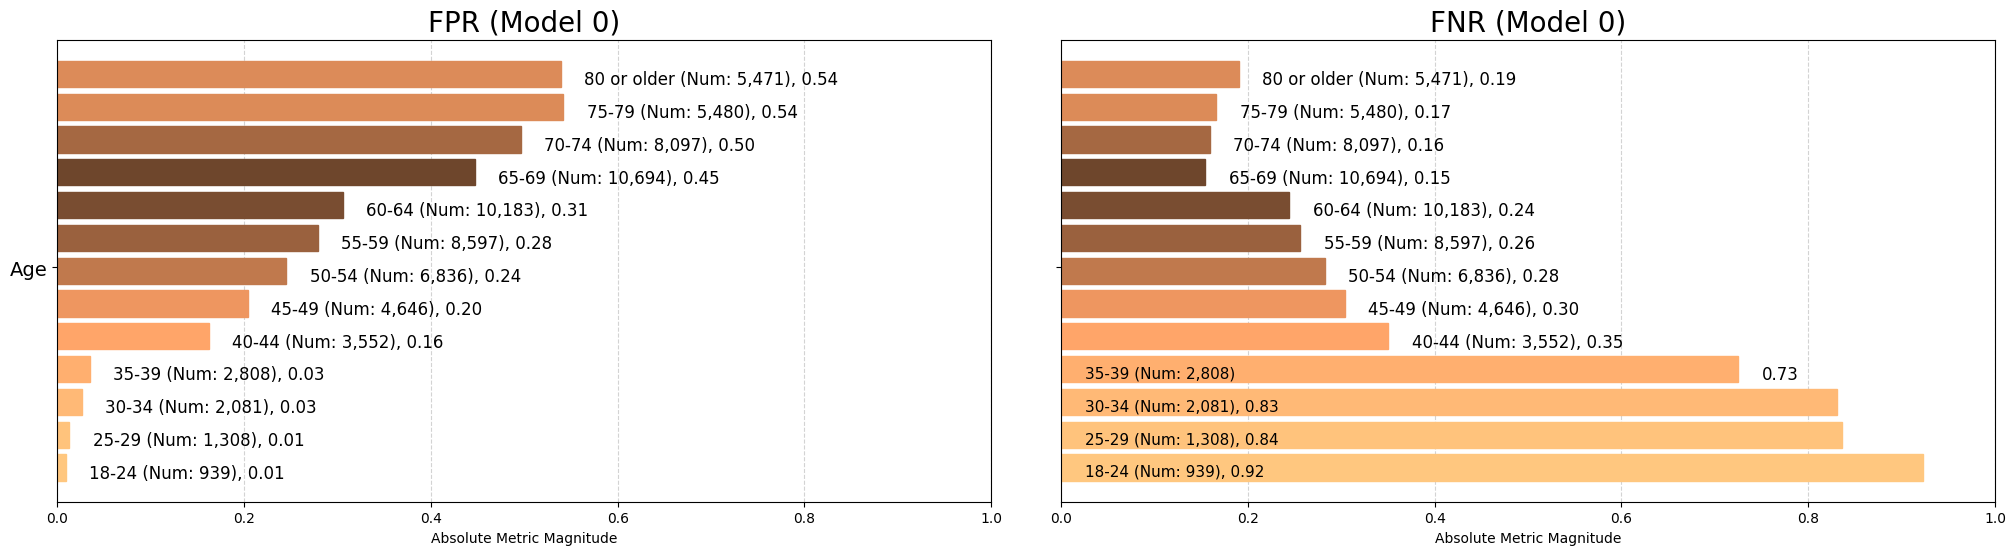

<Figure size 640x480 with 0 Axes>

In [ ]:
age_xtab = xtab[xtab['attribute_name'] == 'Age']

plot = aqp.plot_group_metric_all(age_xtab, metrics = ['fpr', 'fnr'], ncols = 2)

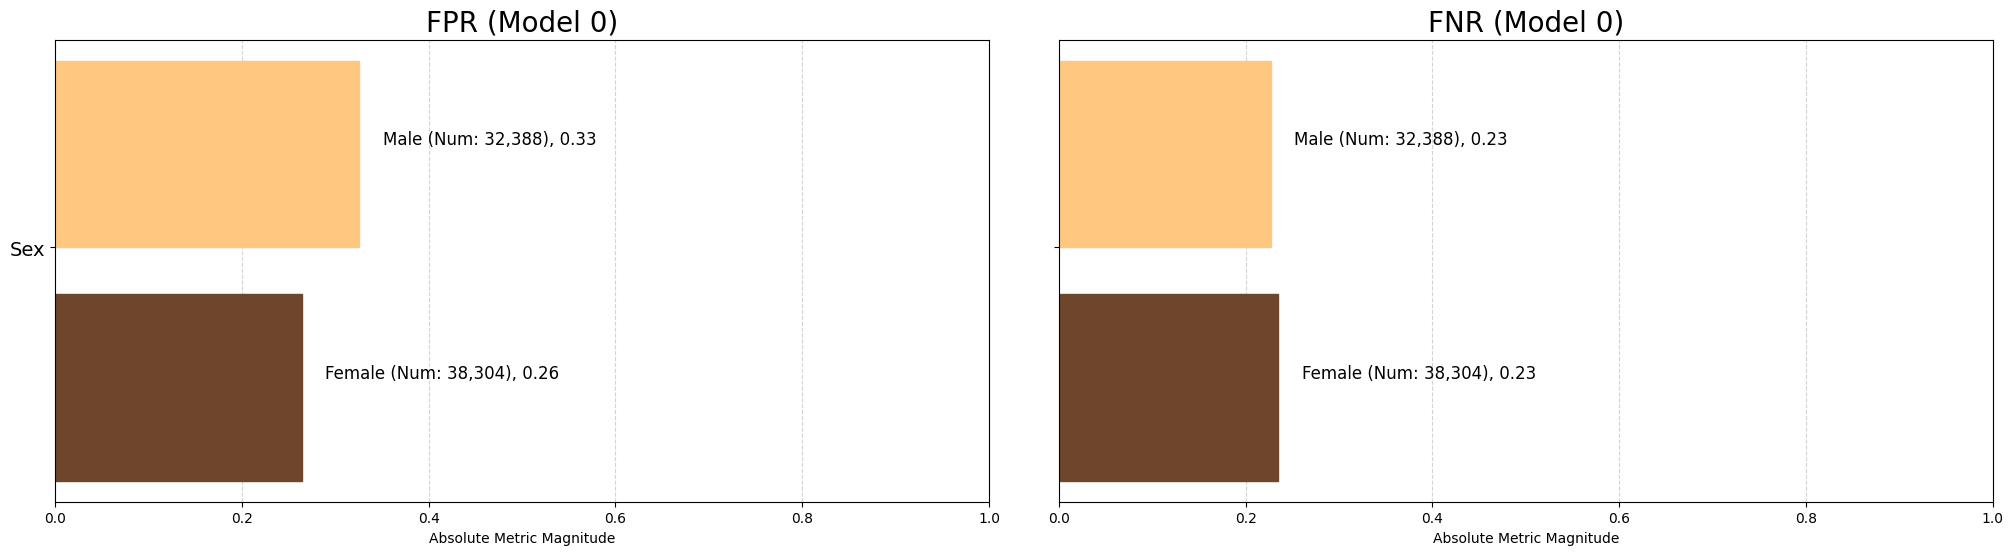

<Figure size 640x480 with 0 Axes>

In [ ]:
sex_xtab = xtab[xtab['attribute_name'] == 'Sex']

plot = aqp.plot_group_metric_all(sex_xtab, metrics = ['fpr', 'fnr'], ncols = 2)

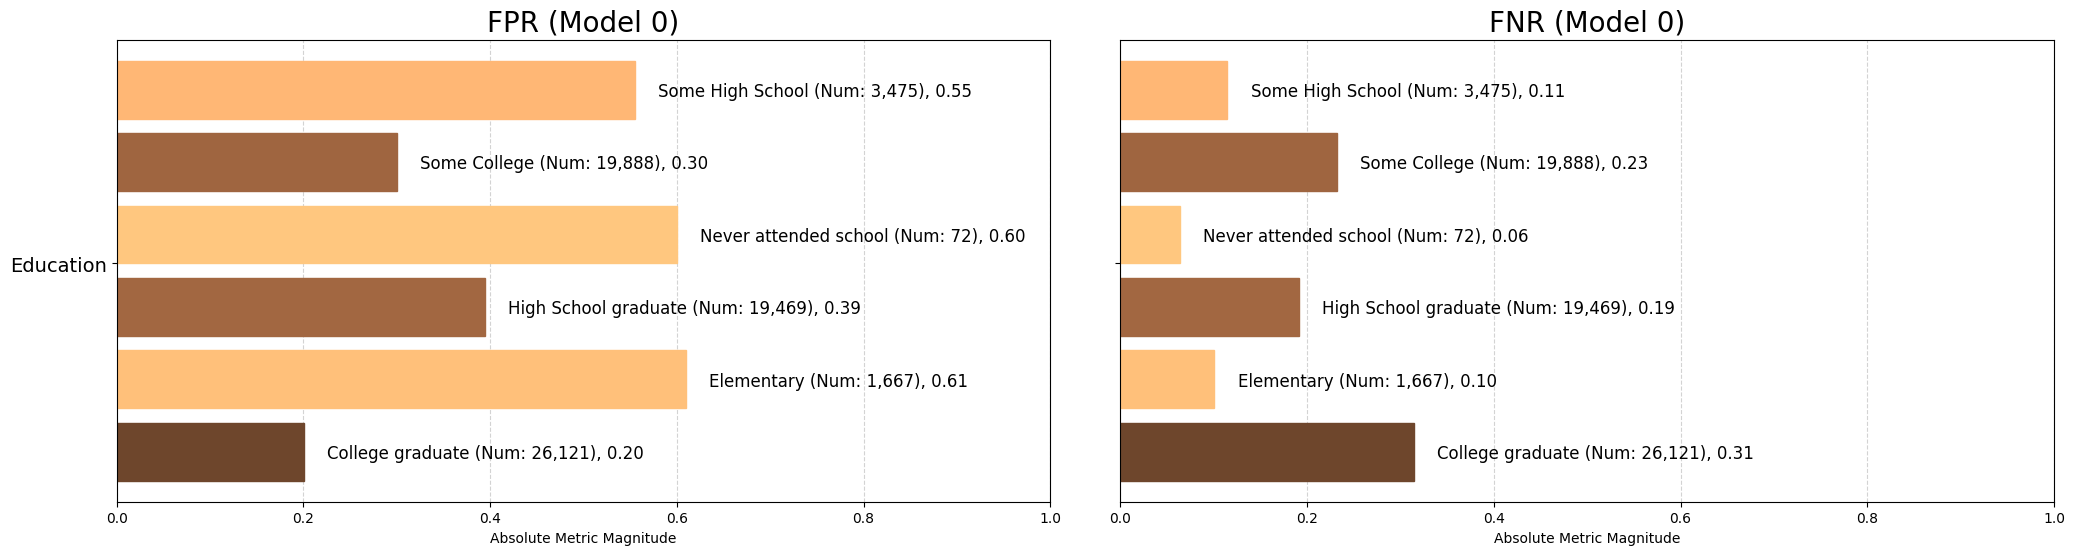

<Figure size 640x480 with 0 Axes>

In [ ]:
edu_xtab = xtab[xtab['attribute_name'] == 'Education']

plot = aqp.plot_group_metric_all(edu_xtab, metrics = ['fpr', 'fnr'], ncols = 2)

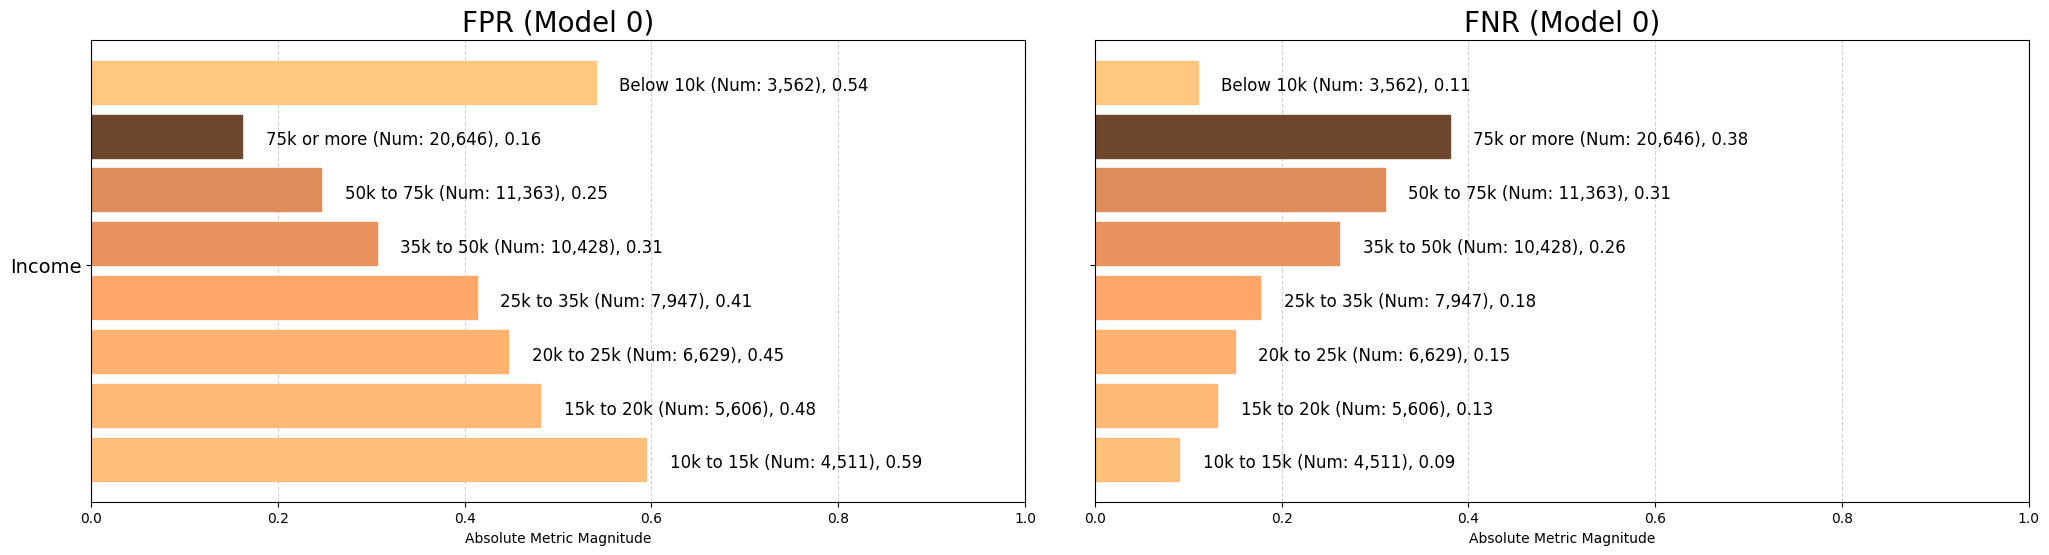

<Figure size 640x480 with 0 Axes>

In [ ]:
income_xtab = xtab[xtab['attribute_name'] == 'Income']

plot = aqp.plot_group_metric_all(income_xtab, metrics = ['fpr', 'fnr'], ncols = 2)

In [ ]:
# Create Bias object
bias = Bias()

# Define crosstab that contains disparities with respect to reference categories for each variable
bdf = bias.get_disparity_predefined_groups(xtab, original_df=df_audit,
                                        ref_groups_dict={'Age':'60-64', 'Education':'College graduate', 'Income':'75k or more',
                                                         'Sex': 'Female'},
                                        alpha=0.05, check_significance=True,
                                        mask_significance=True)
bdf[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bdf) + bias.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,Age,18-24,2.390679,3.780000,0.249581,0.030380,1.340106,0.002459,0.026664,0.563186,1.427210,0.101777,True,True,True,True,True,True,True,True,True,True,True,True
1,Age,25-29,1.651456,3.422250,0.295395,0.041990,1.319342,0.006674,0.051956,0.795377,1.422095,0.217367,True,True,False,True,True,False,True,True,True,False,False,True
2,Age,30-34,1.943936,3.403806,0.422239,0.085118,1.261853,0.017387,0.085079,0.703509,1.403093,0.223326,True,True,True,True,True,True,True,True,True,True,True,True
3,Age,35-39,1.282098,2.969856,0.568640,0.113883,1.195501,0.043555,0.157948,0.911393,1.390419,0.363536,True,True,True,True,True,True,True,True,True,True,True,True
4,Age,40-44,1.559759,1.433834,0.479077,0.530780,1.236093,0.191254,0.548294,0.824179,1.206736,0.859827,True,True,True,True,True,True,True,True,True,True,True,True
5,Age,45-49,1.373714,1.243545,0.597254,0.667667,1.182533,0.317176,0.695179,0.882616,1.146424,0.921310,True,True,True,True,True,True,True,True,True,True,True,True
6,Age,50-54,1.225080,1.155034,0.754607,0.800839,1.111217,0.550580,0.820151,0.929302,1.087750,0.949908,True,True,True,True,True,True,True,True,True,True,True,True
7,Age,55-59,1.153166,1.048005,0.829354,0.910584,1.077341,0.769055,0.910933,0.951891,1.039396,0.984490,True,True,True,True,True,True,True,True,True,True,True,True
8,Age,60-64,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,Age,65-69,1.045639,0.631921,0.983305,1.460910,1.007567,1.298560,1.236510,0.985665,0.796925,1.118927,True,True,False,False,False,False,False,True,True,False,False,False


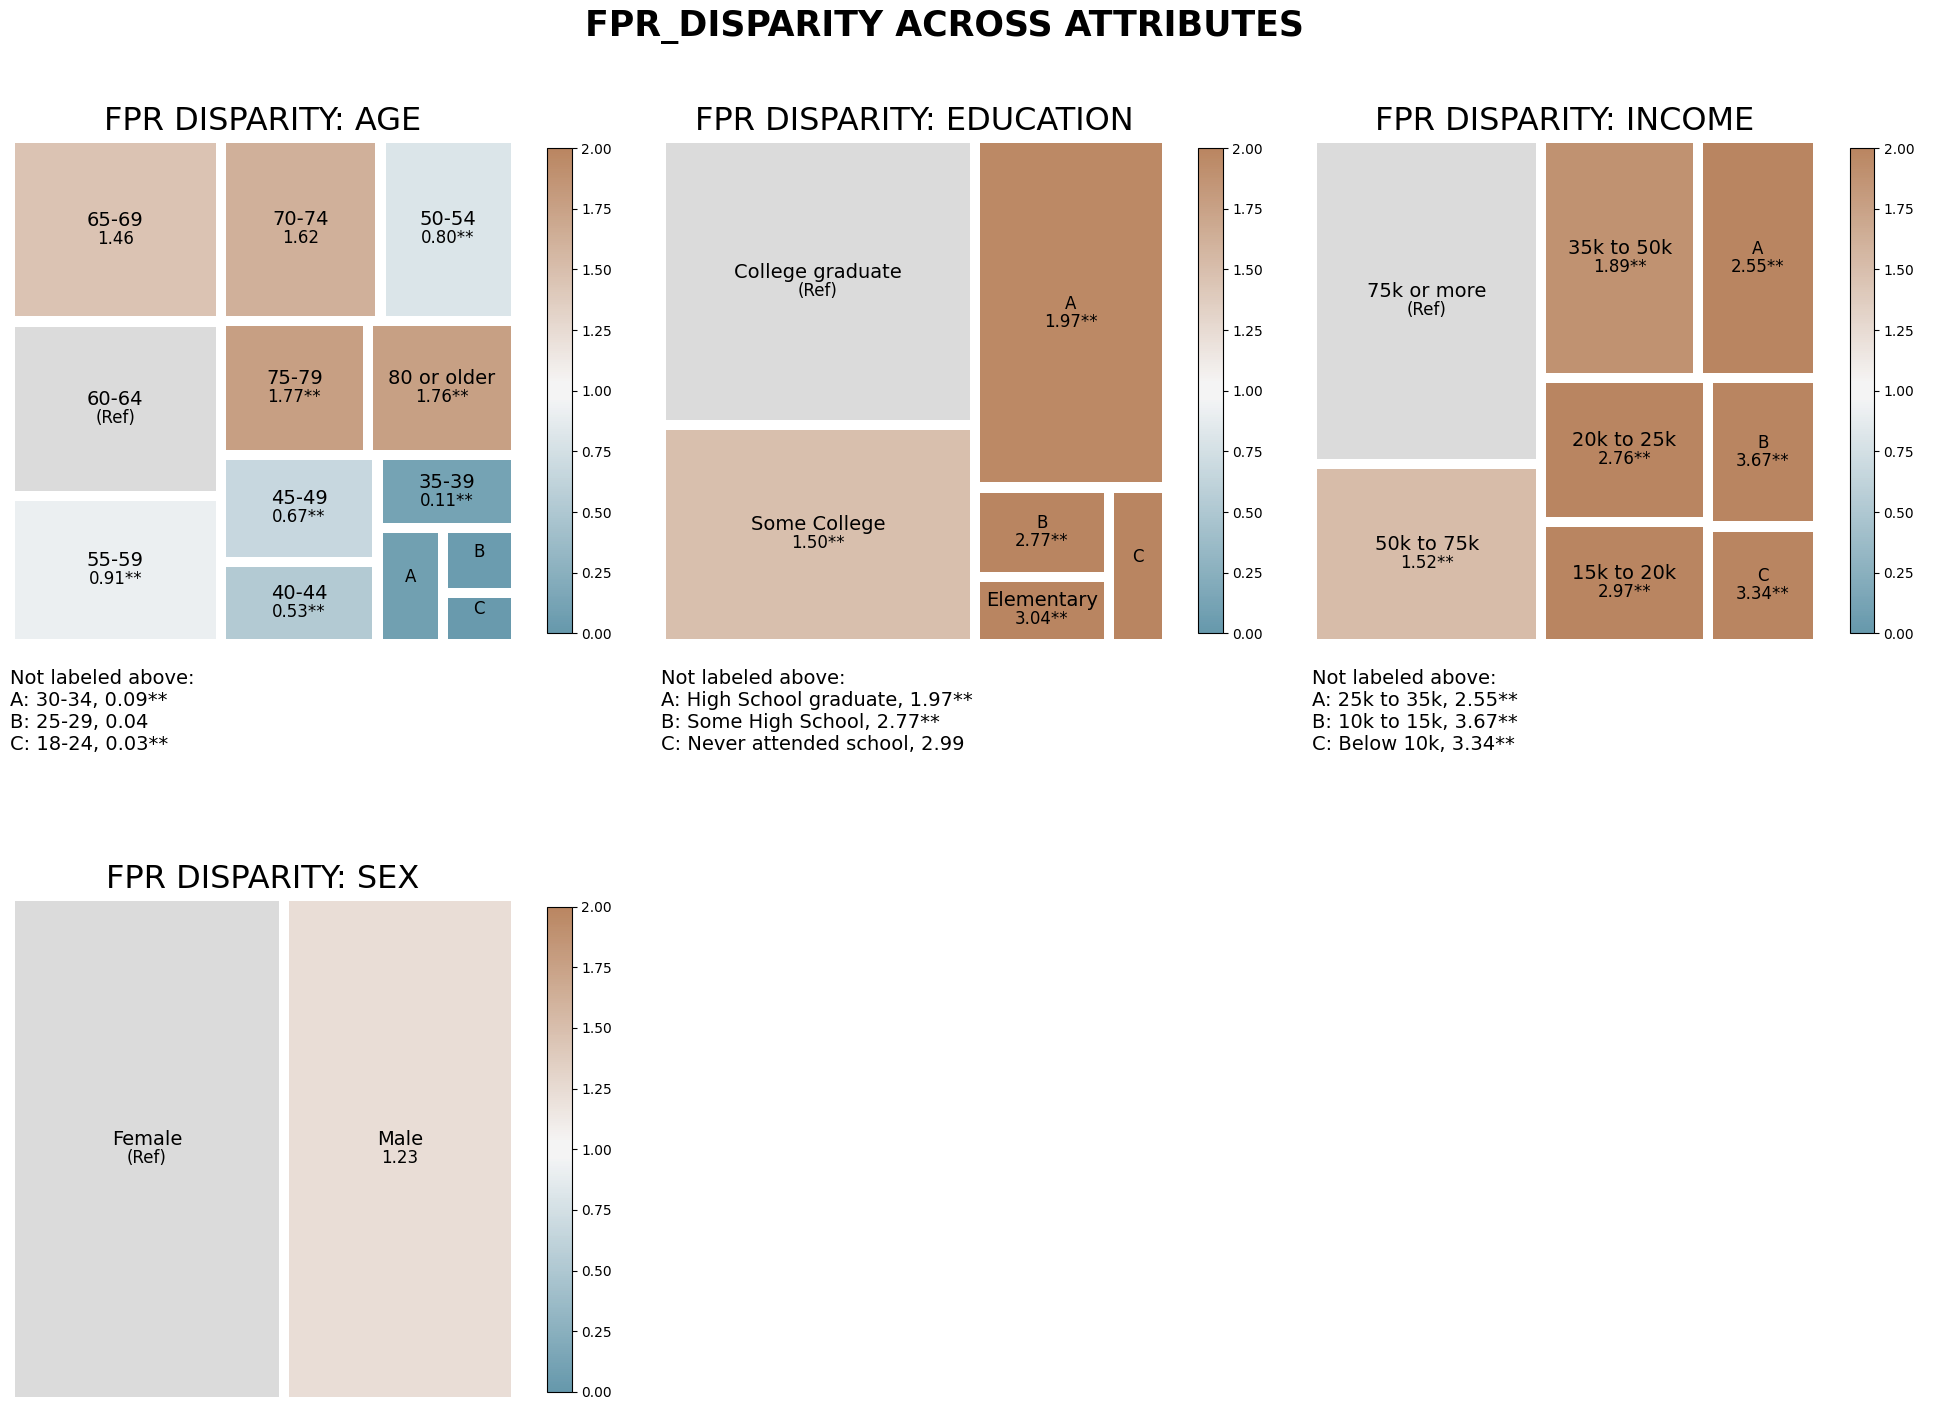

In [ ]:
# Disparity plot across other categories
plot = aqp.plot_disparity_all(bdf, metrics=['fpr_disparity'], significance_alpha=0.05)

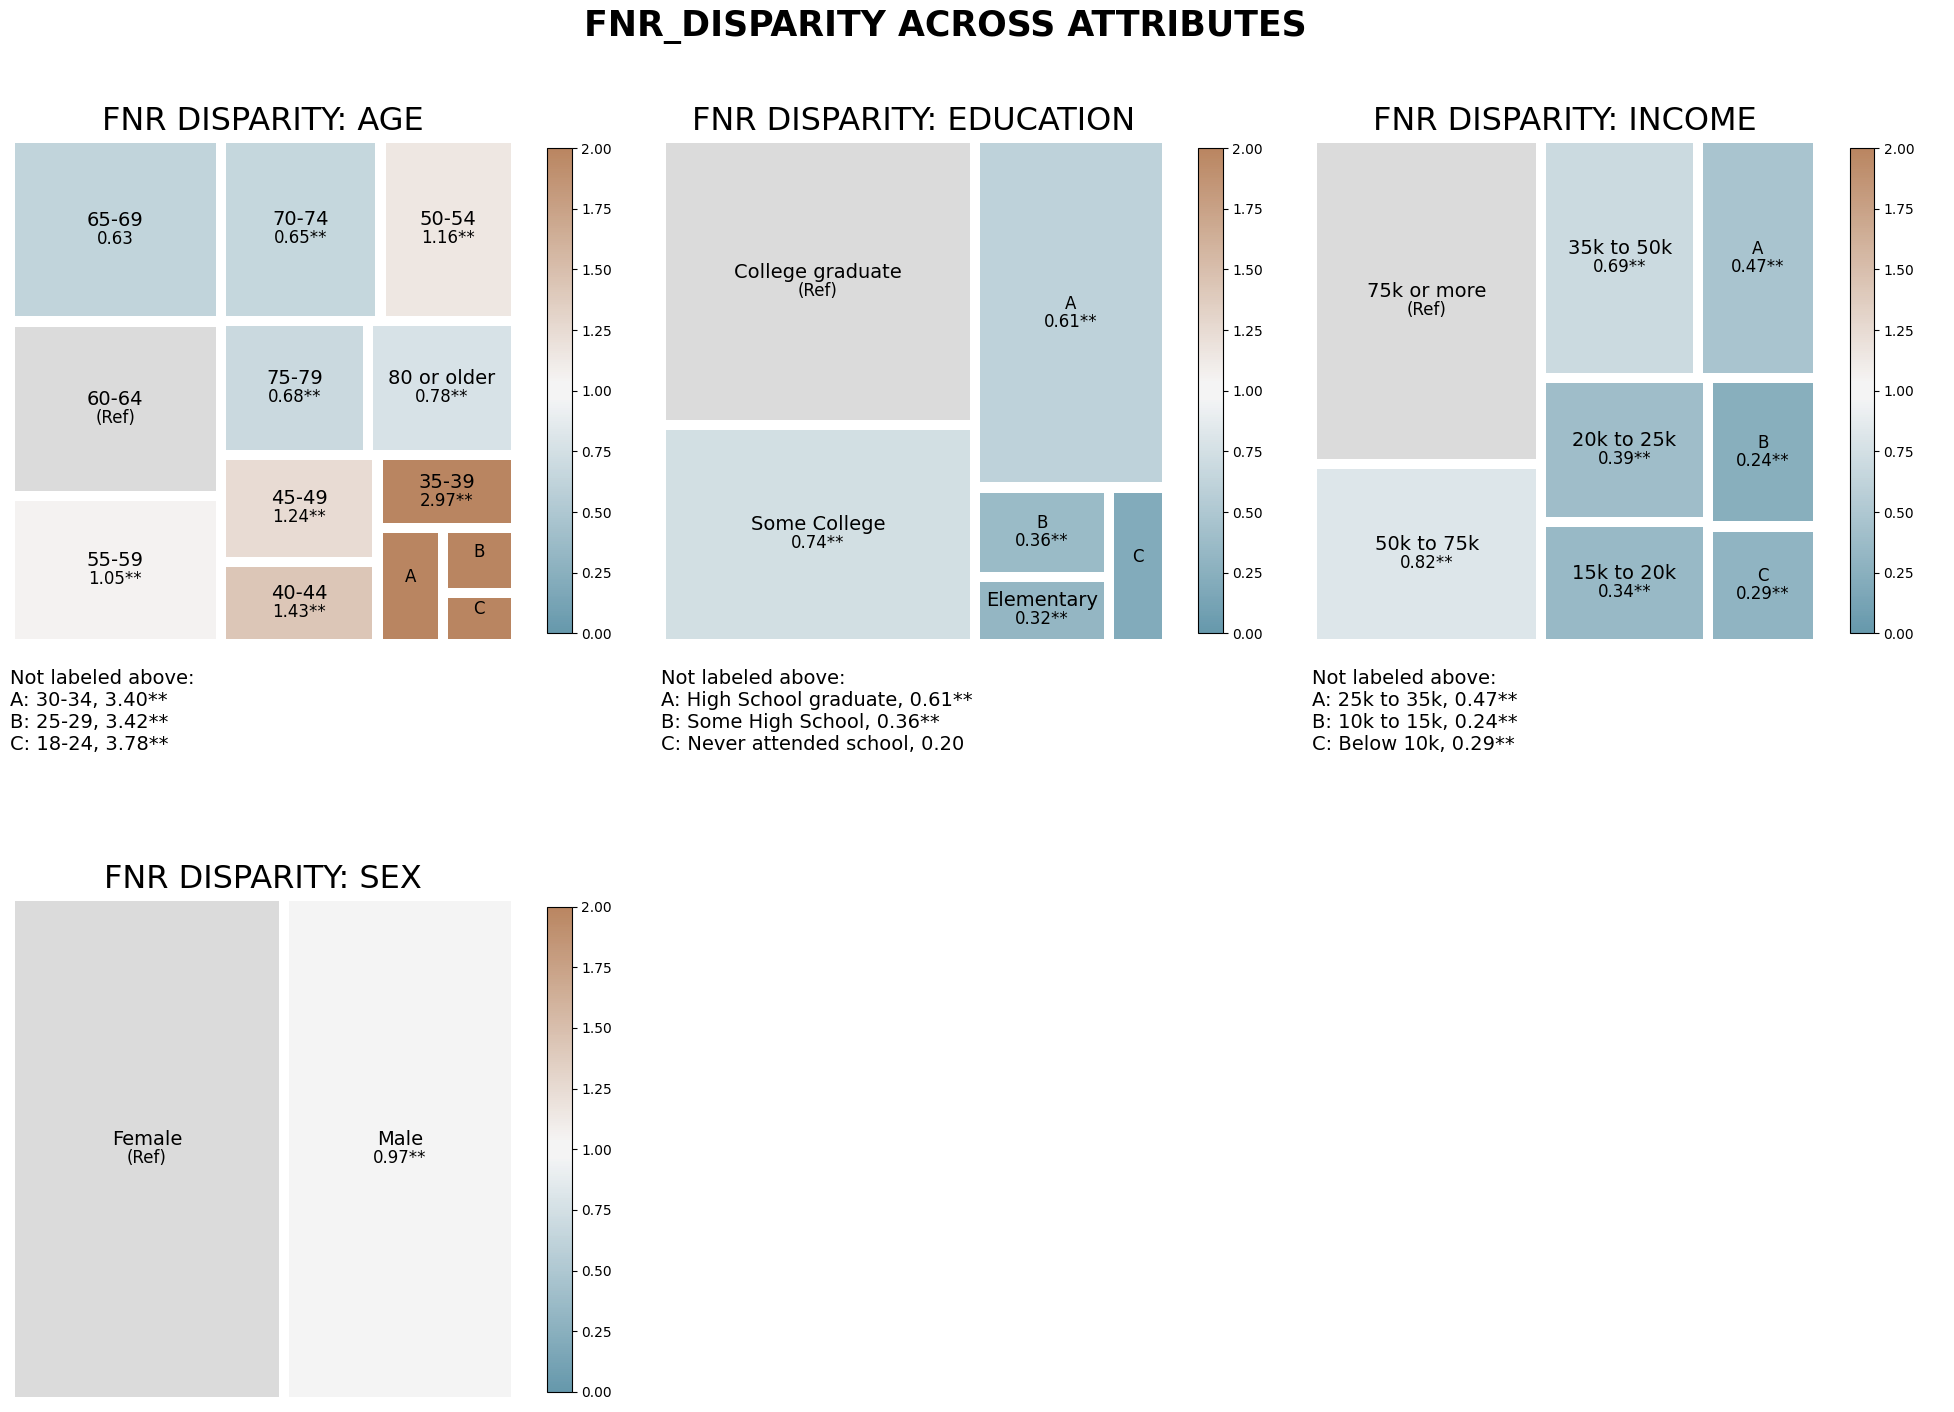

In [ ]:
# Disparity plot across other categories
plot = aqp.plot_disparity_all(bdf, metrics=['fnr_disparity'], significance_alpha=0.05)

In [ ]:
# Create Fairness object
fair = Fairness()

# Define fairness crosstab
fdf = fair.get_group_value_fairness(bdf)

# Compute parities
parity_detrminations = fair.list_parities(fdf)

# Grab parities
gaf = fair.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,Age,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,binary 0/1,Education,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,binary 0/1,Income,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
3,0,binary 0/1,Sex,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


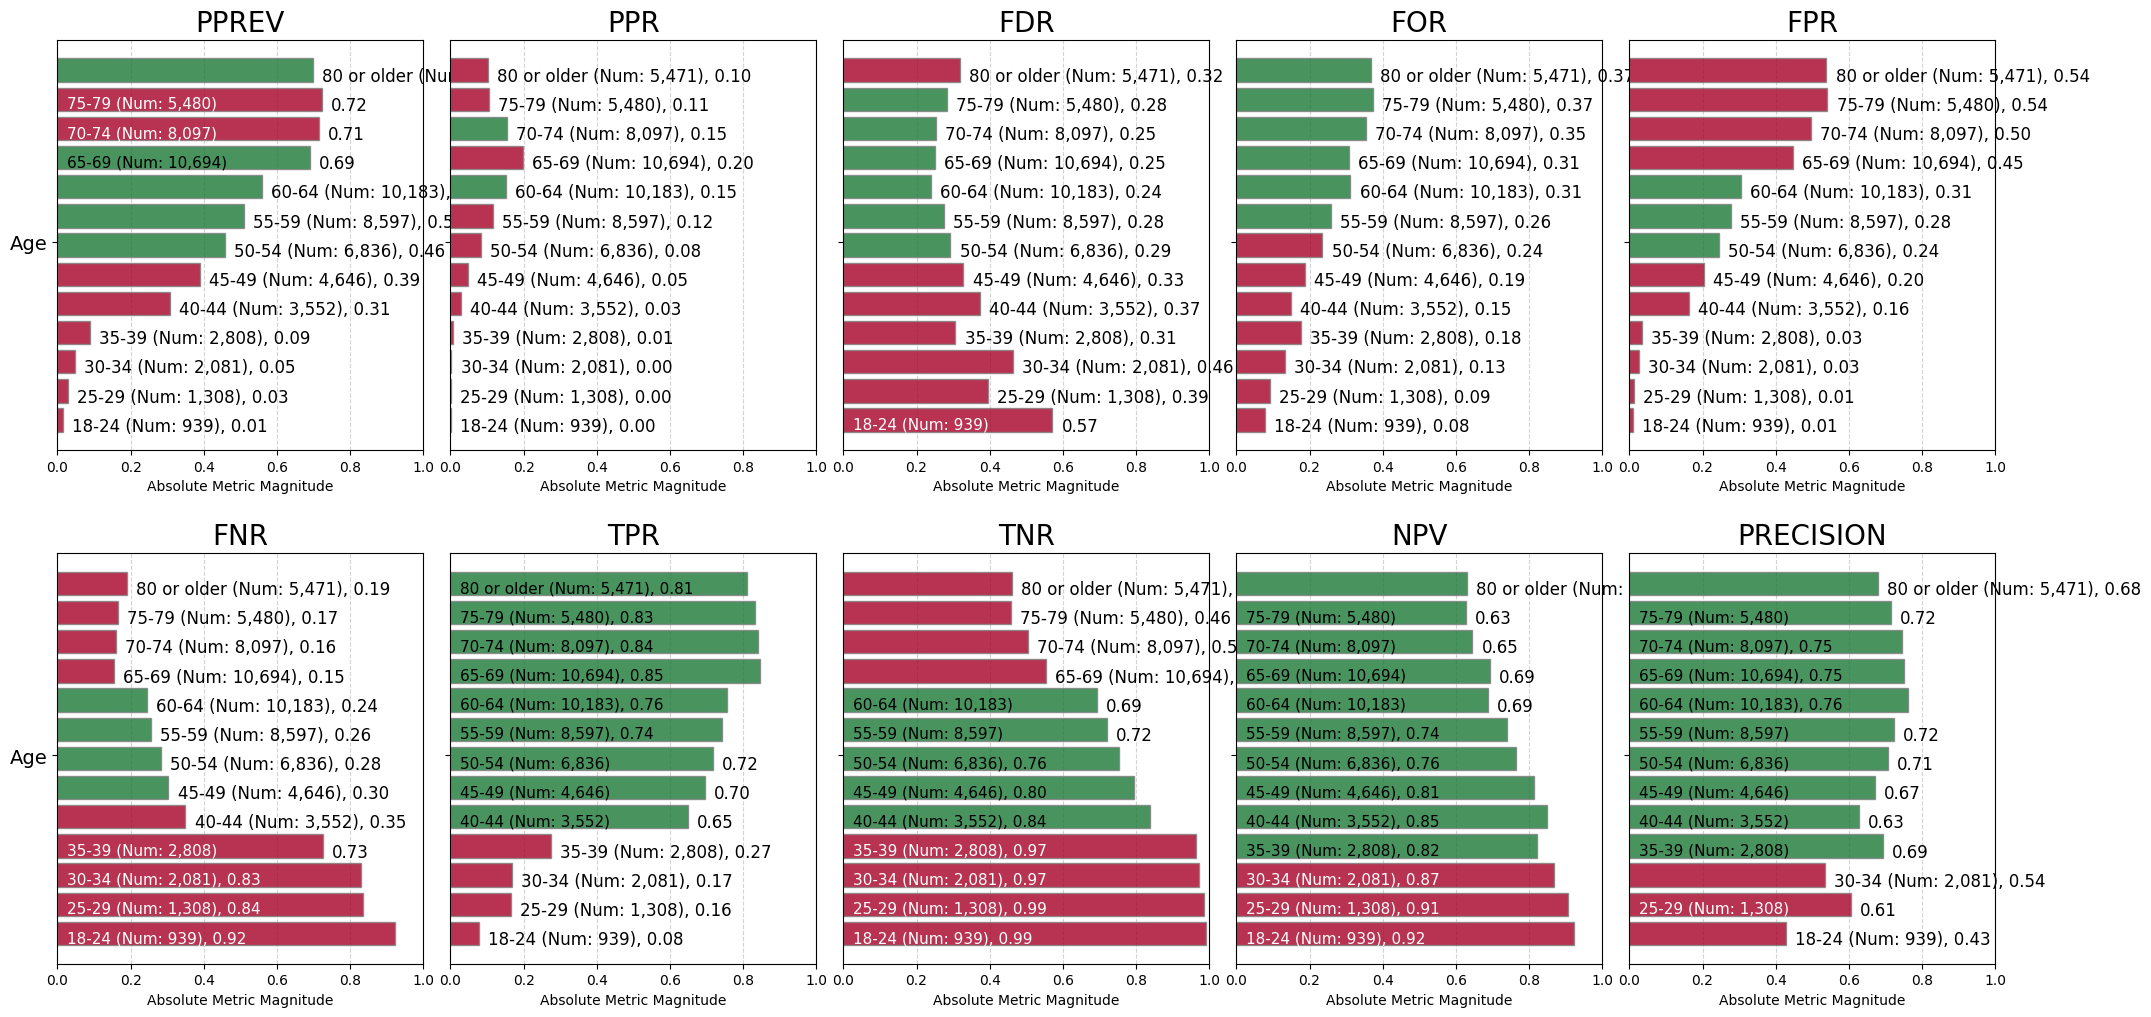

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generate plots for all metrics
age_fdf = fdf[fdf['attribute_name'] == 'Age']
plot = aqp.plot_fairness_group_all(age_fdf, ncols=5, metrics = "all")

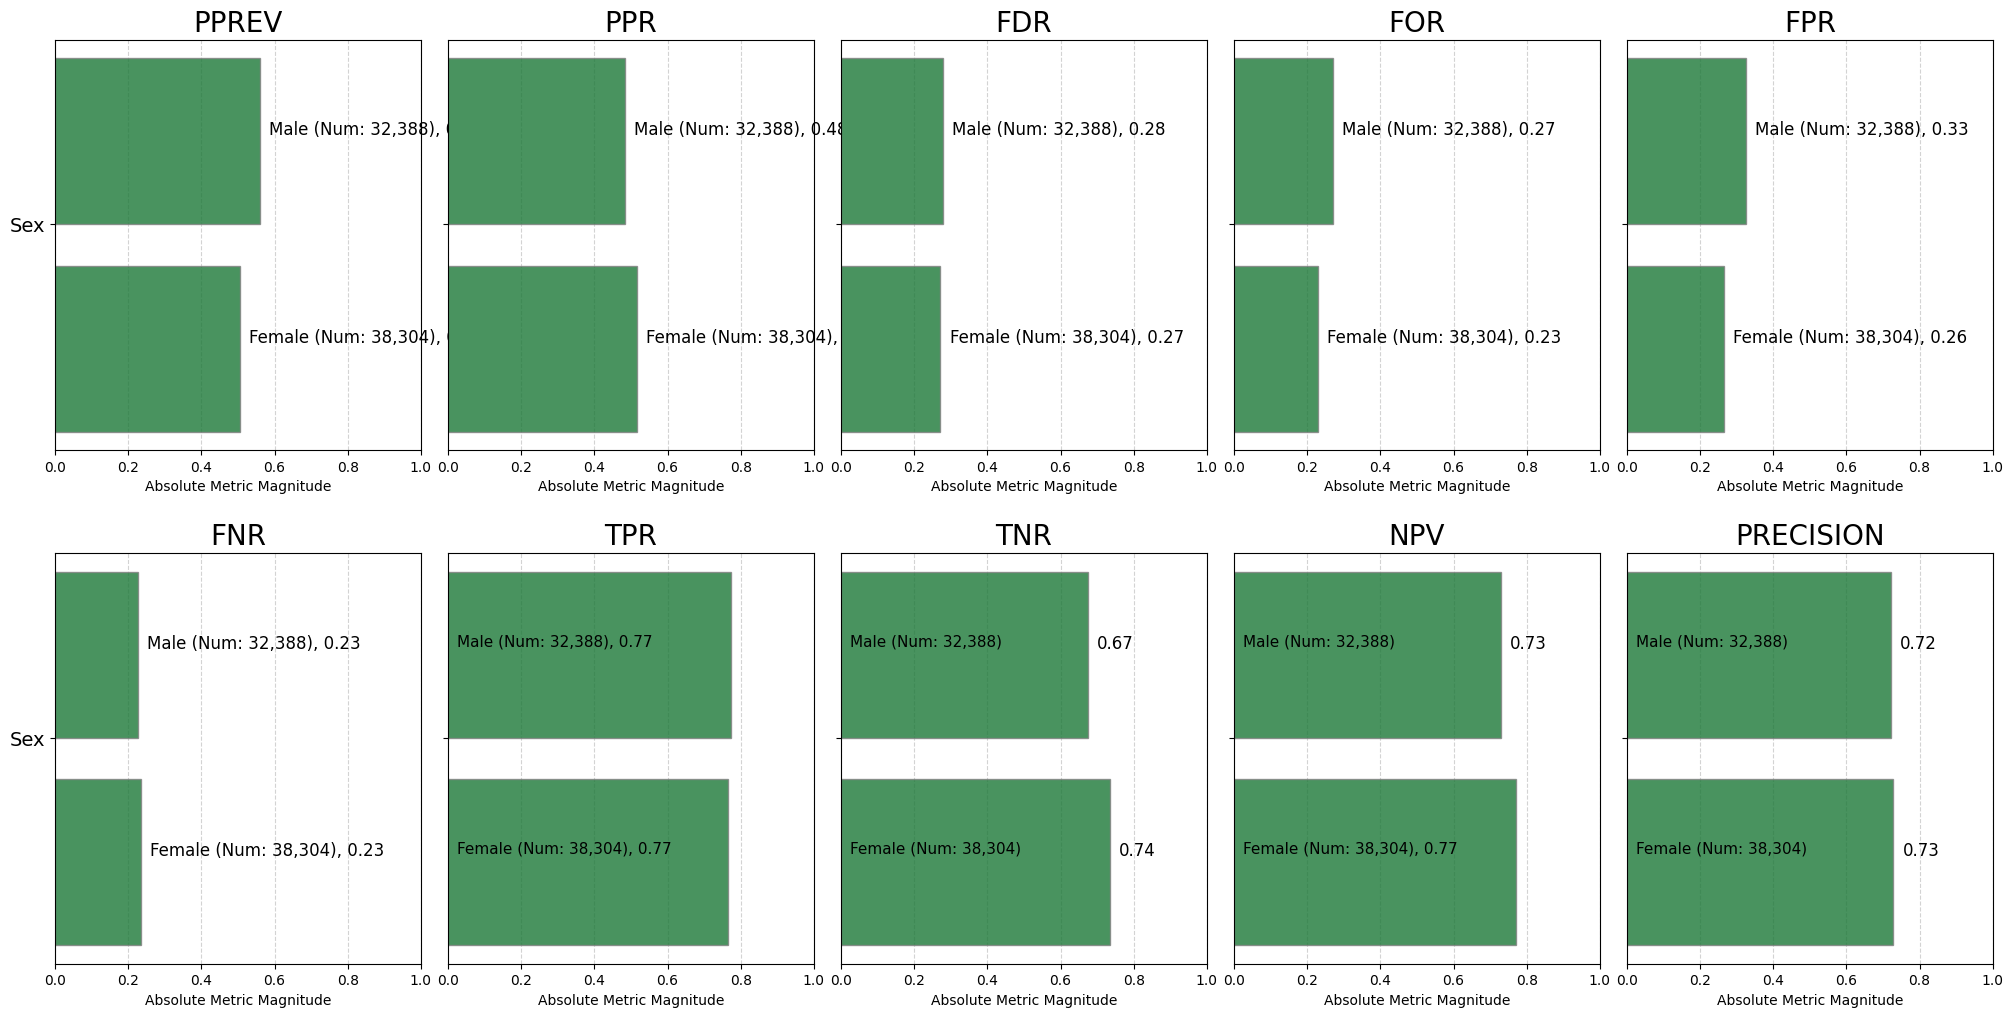

<Figure size 640x480 with 0 Axes>

In [ ]:
sex_fdf = fdf[fdf['attribute_name'] == 'Sex']
plot = aqp.plot_fairness_group_all(sex_fdf, ncols=5, metrics = "all")

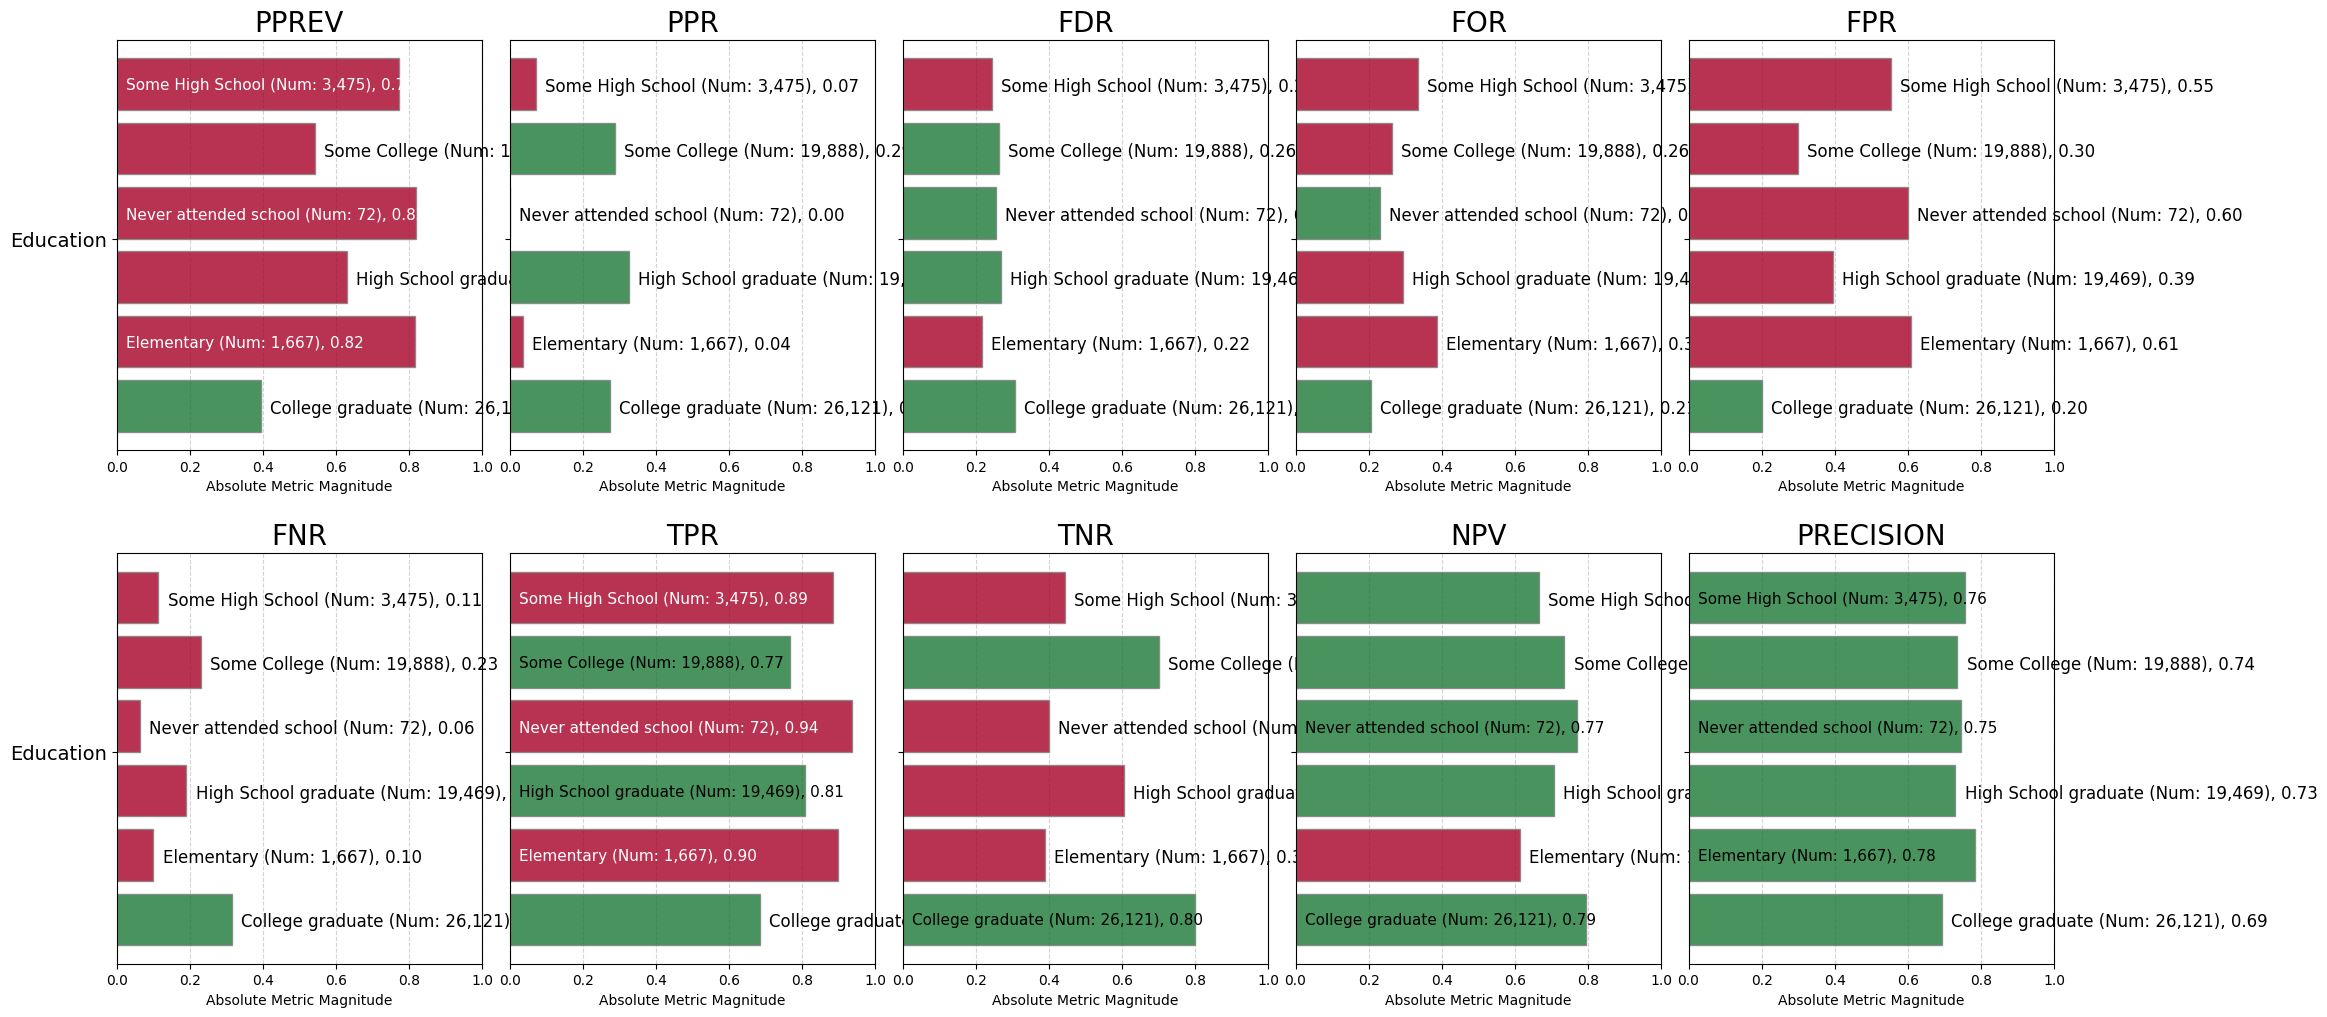

<Figure size 640x480 with 0 Axes>

In [ ]:
edu_fdf = fdf[fdf['attribute_name'] == 'Education']
plot = aqp.plot_fairness_group_all(edu_fdf, ncols=5, metrics = "all")

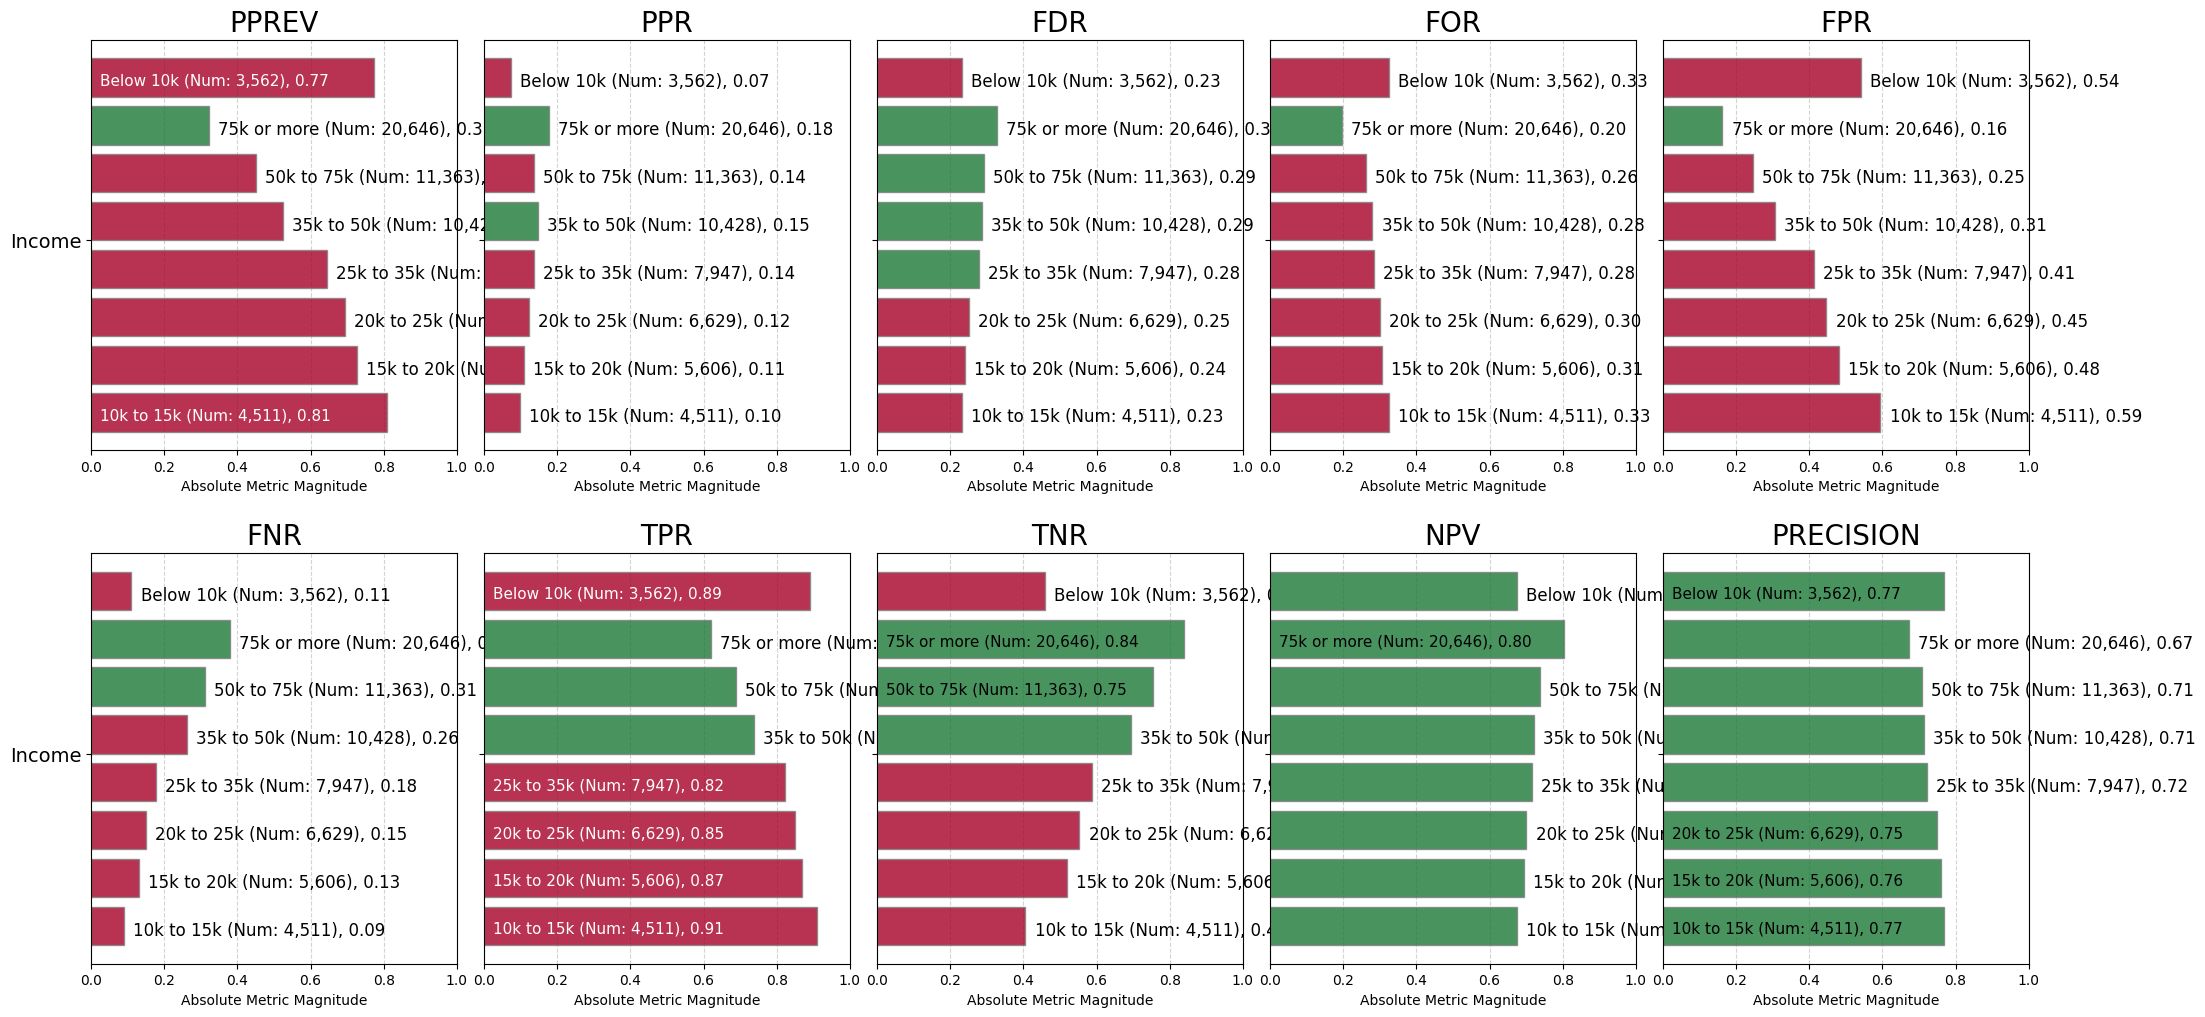

<Figure size 640x480 with 0 Axes>

In [ ]:
income_fdf = fdf[fdf['attribute_name'] == 'Income']
plot = aqp.plot_fairness_group_all(income_fdf, ncols=5, metrics = "all")

In [ ]:
df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()

df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44',
                                           '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69',
                                           '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary',
                                                       '3': 'Some High School', '4': 'High School graduate', '5': 'Some College',
                                                       '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k',
                                                 '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})
df_audit['label_value'] = y_balanced1
df_audit['score'] = full_pred

# Redefine reference groups
audit = Audit(df_audit, label_column = 'label_value', reference_groups = {'Age':'60-64', 'Education':'College graduate',
                                                                          'Income':'75k or more', 'Sex': 'Male'})
audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})
audit.disparity_df

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,...,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,37466,Age,18-24,0.914803,0.076923,0.990708,0.077838,0.571429,...,True,0.563186,60-64,True,1.427210,60-64,True,0.101777,60-64,True
1,0,binary 0/1,37466,Age,25-29,0.899083,0.164286,0.987158,0.092126,0.394737,...,True,0.795377,60-64,False,1.422095,60-64,False,0.217367,60-64,True
2,0,binary 0/1,37466,Age,30-34,0.852475,0.168790,0.973967,0.131685,0.464646,...,True,0.703509,60-64,True,1.403093,60-64,True,0.223326,60-64,True
3,0,binary 0/1,37466,Age,35-39,0.811254,0.274760,0.965170,0.177344,0.306452,...,True,0.911393,60-64,True,1.390419,60-64,True,0.363536,60-64,True
4,0,binary 0/1,37466,Age,40-44,0.782095,0.649857,0.837665,0.149411,0.372819,...,True,0.824179,60-64,True,1.206736,60-64,True,0.859827,60-64,True
5,0,binary 0/1,37466,Age,45-49,0.758502,0.696326,0.795799,0.186268,0.328350,...,True,0.882616,60-64,True,1.146424,60-64,True,0.921310,60-64,True
6,0,binary 0/1,37466,Age,50-54,0.738297,0.717940,0.755069,0.235342,0.292823,...,True,0.929302,60-64,True,1.087750,60-64,True,0.949908,60-64,True
7,0,binary 0/1,37466,Age,55-59,0.732697,0.744077,0.721504,0.258653,0.275634,...,True,0.951891,60-64,True,1.039396,60-64,True,0.984490,60-64,True
8,0,binary 0/1,37466,Age,60-64,0.728862,0.755800,0.694157,0.311873,0.239024,...,False,1.000000,60-64,False,1.000000,60-64,False,1.000000,60-64,False
9,0,binary 0/1,37466,Age,65-69,0.732560,0.845685,0.553191,0.306667,0.249932,...,True,0.985665,60-64,False,0.796925,60-64,False,1.118927,60-64,False


In [ ]:
# Check which categories and groups pass parity tests
audit.summary_plot(metrics = ['fpr', 'fnr'], fairness_threshold = 1.25)

alt.VConcatChart(...)

In [ ]:
# drop age, education, income columns to see if bias is removed
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

columns_to_drop = ["Age_0_to_4", "Age_4_to_9", "Age_10_to_15"]

df_original = X_balanced1.copy()

# Drop suspected biased column
df_without_age = X_balanced1.drop(columns_to_drop, axis=1)

original_predictions = model.predict(df_original)

# rebuild model with resampled data and age removed
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_age, y_balanced, test_size=0.2, random_state=1)

# Build Logistic Regression model
model_no_age = LogisticRegression(max_iter=1000)

# Fit model on training data
model_no_age.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model_no_age.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy (without Age):", train_accuracy)

# Predictions on testing data
y_test_pred = model_no_age.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy (without Age):", test_accuracy)

modified_predictions = model_no_age.predict(df_without_age)

# Compute classification reports for both sets of predictions
original_classification_report = classification_report(y_balanced1, original_predictions)
modified_classification_report = classification_report(y_balanced1, modified_predictions)

# Print the classification reports to compare
print("Classification Report Before Dropping the Age Column:")
print(original_classification_report)
print("\nClassification Report After Dropping the Age Column:")
print(modified_classification_report)

changed_labels = np.sum(np.abs(original_predictions - modified_predictions))
changed_labels

# Calculate confusion matrix after removing
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()

df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44',
                                           '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69',
                                           '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary',
                                                       '3': 'Some High School', '4': 'High School graduate', '5': 'Some College',
                                                       '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k',
                                                 '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})
df_audit['label_value'] = y_balanced1
df_audit['score'] = modified_predictions

# Redefine reference groups
audit = Audit(df_audit, label_column = 'label_value', reference_groups = {'Age':'60-64', 'Education':'College graduate',
                                                                          'Income':'75k or more', 'Sex': 'Male'})
audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})
audit.summary_plot(metrics = ['fpr', 'fnr'], fairness_threshold = 1.25)

Training Accuracy (without Age): 0.733471257050908
Testing Accuracy (without Age): 0.7356955937477898
Classification Report Before Dropping the Age Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.73      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692


Classification Report After Dropping the Age Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.72      0.76      0.74     35346

    accuracy                           0.73     70692
   macro avg       0.73      0.73      0.73     70692
weighted avg       0.73      0.73      0.73     70692

Confusion Matrix:
[[5077 2064]
 [1673 5325]]


alt.VConcatChart(...)

In [ ]:
columns_to_drop = ["Education_0_to_1",	"Education_2_to_3",	"Education_4_to_6"]

df_original = X_balanced1.copy()

# Drop suspected biased column
df_without_education = X_balanced1.drop(columns_to_drop, axis=1)

original_predictions = model.predict(df_original)

# rebuild model with resampled data and education removed
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_education, y_balanced, test_size=0.2, random_state=1)

# Build Logistic Regression model
model_no_education = LogisticRegression(max_iter=1000)

# Fit model on training data
model_no_education.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model_no_education.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy (without Education):", train_accuracy)

# Predictions on testing data
y_test_pred = model_no_education.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy (without Education):", test_accuracy)

modified_predictions = model_no_education.predict(df_without_education)

# Compute classification reports for both sets of predictions
original_classification_report = classification_report(y_balanced1, original_predictions)
modified_classification_report = classification_report(y_balanced1, modified_predictions)

# Print the classification reports to compare
print("Classification Report Before Dropping the Education Column:")
print(original_classification_report)
print("\nClassification Report After Dropping the Education Column:")
print(modified_classification_report)

changed_labels = np.sum(np.abs(original_predictions - modified_predictions))
changed_labels

# Calculate confusion matrix after removing
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()

df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44',
                                           '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69',
                                           '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary',
                                                       '3': 'Some High School', '4': 'High School graduate', '5': 'Some College',
                                                       '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k',
                                                 '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})
df_audit['label_value'] = y_balanced1
df_audit['score'] = modified_predictions

# Redefine reference groups
audit = Audit(df_audit, label_column = 'label_value', reference_groups = {'Age':'60-64', 'Education':'College graduate',
                                                                          'Income':'75k or more', 'Sex': 'Male'})
audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})
audit.summary_plot(metrics = ['fpr', 'fnr'], fairness_threshold = 1.25)

Training Accuracy (without Education): 0.7389882057538946
Testing Accuracy (without Education): 0.7385246481363604
Classification Report Before Dropping the Education Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.73      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692


Classification Report After Dropping the Education Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.73      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692

Confusion Matrix:
[[5077 2064]
 [1633 5365]]


alt.VConcatChart(...)

In [ ]:
columns_to_drop = ["Income_0_to_2",	"Income_3_to_5",	"Income_6_to_8"]

df_original = X_balanced1.copy()

# Drop suspected biased column
df_without_income = X_balanced1.drop(columns_to_drop, axis=1)

original_predictions = model.predict(df_original)

# rebuild model with resampled data and income removed
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_income, y_balanced, test_size=0.2, random_state=1)

# Build Logistic Regression model
model_no_income = LogisticRegression(max_iter=1000)

# Fit model on training data
model_no_income.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model_no_income.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy (without Income):", train_accuracy)

# Predictions on testing data
y_test_pred = model_no_income.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy (without Income):", test_accuracy)

modified_predictions = model_no_income.predict(df_without_income)

# Compute classification reports for both sets of predictions
original_classification_report = classification_report(y_balanced1, original_predictions)
modified_classification_report = classification_report(y_balanced1, modified_predictions)

# Print the classification reports to compare
print("Classification Report Before Dropping the Income Column:")
print(original_classification_report)
print("\nClassification Report After Dropping the Income Column:")
print(modified_classification_report)

changed_labels = np.sum(np.abs(original_predictions - modified_predictions))
changed_labels

# Calculate confusion matrix after removing
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()

df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44',
                                           '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69',
                                           '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary',
                                                       '3': 'Some High School', '4': 'High School graduate', '5': 'Some College',
                                                       '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k',
                                                 '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})
df_audit['label_value'] = y_balanced1
df_audit['score'] = modified_predictions

# Redefine reference groups
audit = Audit(df_audit, label_column = 'label_value', reference_groups = {'Age':'60-64', 'Education':'College graduate',
                                                                          'Income':'75k or more', 'Sex': 'Male'})
audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})
audit.summary_plot(metrics = ['fpr', 'fnr'], fairness_threshold = 1.25)

Training Accuracy (without Income): 0.7381217618870793
Testing Accuracy (without Income): 0.7366150364240752
Classification Report Before Dropping the Income Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.73      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692


Classification Report After Dropping the Income Column:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.72      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692

Confusion Matrix:
[[5054 2087]
 [1637 5361]]


alt.VConcatChart(...)

In [ ]:
columns_to_drop = ["Age_0_to_4", "Age_4_to_9", "Age_10_to_15", "Education_0_to_1",	"Education_2_to_3",	"Education_4_to_6", "Income_0_to_2",	"Income_3_to_5",	"Income_6_to_8"]

df_original = X_balanced1.copy()

# Drop suspected biased column
df_without_bias = X_balanced1.drop(columns_to_drop, axis=1)

original_predictions = model.predict(df_original)

# rebuild model with resampled data and age, education, income removed
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_without_bias, y_balanced, test_size=0.2, random_state=1)

# Build Logistic Regression model
model_no_bias = LogisticRegression(max_iter=1000)

# Fit model on training data
model_no_bias.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model_no_bias.predict(X_train)

# Count the number of correct predictions for training data
num_correct_train = sum(y_train == y_train_pred)

# Calculate accuracy for training data
train_accuracy = num_correct_train / len(y_train)
print("Training Accuracy (without Age, Education, or Income):", train_accuracy)

# Predictions on testing data
y_test_pred = model_no_bias.predict(X_test)

# Count the number of correct predictions for testing data
num_correct_test = sum(y_test == y_test_pred)

# Calculate accuracy for testing data
test_accuracy = num_correct_test / len(y_test)
print("Testing Accuracy (without Age, Education, or Income):", test_accuracy)

modified_predictions = model_no_bias.predict(df_without_bias)

# Compute classification reports for both sets of predictions
original_classification_report = classification_report(y_balanced1, original_predictions)
modified_classification_report = classification_report(y_balanced1, modified_predictions)

# Print the classification reports to compare
print("Classification Report Before Dropping Age, Education, and Income Columns:")
print(original_classification_report)
print("\nClassification Report After Dropping Age, Education, and Income Columns:")
print(modified_classification_report)

changed_labels = np.sum(np.abs(original_predictions - modified_predictions))
changed_labels

# Calculate confusion matrix after removing
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

df_audit = balanced_df[['Age', 'Education', 'Income', 'Sex']].copy()

df_audit['Age'] = df_audit['Age'].astype(str)
df_audit['Education'] = df_audit['Education'].astype(str)
df_audit['Income'] = df_audit['Income'].astype(str)
df_audit['Sex'] = df_audit['Sex'].astype(str)

df_audit['Age'] = df_audit['Age'].replace({'1': '18-24', '2': '25-29', '3': '30-34', '4': '35-39', '5': '40-44',
                                           '6': '45-49', '7': '50-54', '8': '55-59', '9': '60-64', '10': '65-69',
                                           '11': '70-74', '12': '75-79', '13': '80 or older'})
df_audit['Education'] = df_audit['Education'].replace({'1': 'Never attended school', '2': 'Elementary',
                                                       '3': 'Some High School', '4': 'High School graduate', '5': 'Some College',
                                                       '6': 'College graduate'})
df_audit['Income'] = df_audit['Income'].replace({'1': 'Below 10k', '2': '10k to 15k', '3': '15k to 20k', '4': '20k to 25k',
                                                 '5': '25k to 35k', '6': '35k to 50k', '7': '50k to 75k', '8': '75k or more'})
df_audit['Sex'] = df_audit['Sex'].replace({'0': 'Female', '1': 'Male'})
df_audit['label_value'] = y_balanced1
df_audit['score'] = modified_predictions

# Redefine reference groups
audit = Audit(df_audit, label_column = 'label_value', reference_groups = {'Age':'60-64', 'Education':'College graduate',
                                                                          'Income':'75k or more', 'Sex': 'Male'})
audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})
audit.summary_plot(metrics = ['fpr', 'fnr'], fairness_threshold = 1.25)

Training Accuracy (without Age, Education, or Income): 0.7323749403214683
Testing Accuracy (without Age, Education, or Income): 0.734422519272933
Classification Report Before Dropping Age, Education, and Income Columns:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     35346
           1       0.73      0.77      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.74      0.74      0.74     70692
weighted avg       0.74      0.74      0.74     70692


Classification Report After Dropping Age, Education, and Income Columns:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     35346
           1       0.72      0.77      0.74     35346

    accuracy                           0.73     70692
   macro avg       0.73      0.73      0.73     70692
weighted avg       0.73      0.73      0.73     70692

Confusion Matrix:
[[5004 2137]
 [1618 5380]]


alt.VConcatChart(...)